In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
df= pd.read_csv('Churn.csv',index_col=0)
df

state      area.code  account.length voice.plan  voice.messages  \
1       KS  area_code_415             128        yes              25   
2       OH  area_code_415             107        yes              26   
3       NJ  area_code_415             137         no               0   
4       OH  area_code_408              84         no               0   
5       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4996    HI  area_code_408              50        yes              40   
4997    WV  area_code_415             152         no               0   
4998    DC  area_code_415              61         no               0   
4999    DC  area_code_510             109         no               0   
5000    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
1           no       10.0           3         2.70     265.1        110   
2           no       13.7           3         3.70     161.6        123   
3           no       12.2           5         3.29     243.4        114   
4          yes        6.6           7         1.78     299.4         71   
5          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4996        no        9.9           5         2.67     235.7        127   
4997        no       14.7           2         3.97     184.2         90   
4998        no       13.6           4         3.67     140.6         89   
4999        no        8.5           6         2.30     188.8         67   
5000        no        9.3          16         2.51     129.4        102   

     day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
1         45.07    197.4         99       16.78       244.7           91   
2         27.47    195.5        103       16.62       254.4          103   
3         41.38    121.2        110       10.30       162.6          104   
4          50.9     61.9         88        5.26       196.9           89   
5         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4996      40.07      223        126       18.96       297.5          116   
4997      31.31    256.8         73       21.83       213.6          113   
4998       23.9    172.8        128       14.69       212.4           97   
4999       32.1    171.7         92       14.59       224.4           89   
5000         22    267.1        104       22.70       154.8          100   

      night.charge  customer.calls churn  
1            11.01               1    no  
2            11.45               1    no  
3             7.32               0    no  
4             8.86               2    no  
5             8.41               3    no  
...            ...             ...   ...  
4996         13.39               2    no  
4997          9.61               3   yes  
4998          9.56               1    no  
4999         10.10               0    no  
5000          6.97               0    no  

[5000 rows x 20 columns]

In [3]:
df1=df.copy()

## Exploratory Data Analysis (EDA)

In [4]:
df.describe()

account.length  voice.messages    intl.mins   intl.calls  intl.charge  \
count      5000.00000     5000.000000  5000.000000  5000.000000  5000.000000   
mean        100.25860        7.755200    10.261780     4.435200     2.771196   
std          39.69456       13.546393     2.761396     2.456788     0.745514   
min           1.00000        0.000000     0.000000     0.000000     0.000000   
25%          73.00000        0.000000     8.500000     3.000000     2.300000   
50%         100.00000        0.000000    10.300000     4.000000     2.780000   
75%         127.00000       17.000000    12.000000     6.000000     3.240000   
max         243.00000       52.000000    20.000000    20.000000     5.400000   

          day.mins    day.calls    eve.calls   eve.charge   night.mins  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    180.288900   100.029400   100.191000    17.054322   200.391620   
std      53.894699    19.831197    19.826496     4.296843    50.527789   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     143.700000    87.000000    87.000000    14.140000   166.900000   
50%     180.100000   100.000000   100.000000    17.090000   200.400000   
75%     216.200000   113.000000   114.000000    19.900000   234.700000   
max     351.500000   165.000000   170.000000    30.910000   395.000000   

       night.calls  night.charge  customer.calls  
count  5000.000000   5000.000000     5000.000000  
mean     99.919200      9.017732        1.570400  
std      19.958686      2.273763        1.306363  
min       0.000000      0.000000        0.000000  
25%      87.000000      7.510000        1.000000  
50%     100.000000      9.020000        1.000000  
75%     113.000000     10.560000        2.000000  
max     175.000000     17.770000        9.000000

In [5]:
df1.shape

(5000, 20)

In [6]:
# The data contains 5000 rows and 20 columns.

In [7]:
df1.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [8]:
df1.rename(columns={'state':'State', 'area.code':'area_code', 'account.length':'account_length', 'voice.plan':'voice_plan',
       'voice.messages':'voice_messages', 'intl.plan':'intl_plan', 'intl.mins':'intl_mins', 'intl.calls':'intl_calls', 'intl.charge':'intl_charge',
       'day.mins':'day_mins', 'day.calls':'day_calls', 'day.charge':'day_charge', 'eve.mins':'eve_mins', 'eve.calls':'eve_calls',
       'eve.charge':'eve_charge', 'night.mins':'night_mins', 'night.calls':'night_calls', 'night.charge':'night_charge',
       'customer.calls':'customer_calls', 'churn':'Churn'},inplace=True)

In [9]:
df1.columns

Index(['State', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'Churn'],
      dtype='object')

In [10]:
df1.dtypes

State              object
area_code          object
account_length      int64
voice_plan         object
voice_messages      int64
intl_plan          object
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge         object
eve_mins           object
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
Churn              object
dtype: object

Here, we observe that 7 attributes have 'object' datatype.The attributes 'voice_plan','intl_plan','Churn' need to be converted to binary. The datatype of the attributes 'day_charge','eve_mins' should be converted from object to float64.

In [11]:
# Converting to binary.
df1['Churn'].replace(to_replace='yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='no',  value=0, inplace=True)
df1['voice_plan'].replace(to_replace='yes', value=1, inplace=True)
df1['voice_plan'].replace(to_replace='no',  value=0, inplace=True)
df1['intl_plan'].replace(to_replace='yes', value=1, inplace=True)
df1['intl_plan'].replace(to_replace='no',  value=0, inplace=True)

In [12]:
df1

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996          0        9.9           5         2.67     235.7        127   
4997          0       14.7           2         3.97     184.2         90   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

     day_charge eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1         45.07    197.4         99       16.78       244.7           91   
2         27.47    195.5        103       16.62       254.4          103   
3         41.38    121.2        110       10.30       162.6          104   
4          50.9     61.9         88        5.26       196.9           89   
5         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4996      40.07      223        126       18.96       297.5          116   
4997      31.31    256.8         73       21.83       213.6          113   
4998       23.9    172.8        128       14.69       212.4           97   
4999       32.1    171.7         92       14.59       224.4           89   
5000         22    267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
4             8.86               2      0  
5             8.41               3      0  
...            ...             ...    ...  
4996         13.39               2      0  
4997          9.61               3      1  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[5000 rows x 20 columns]

In [13]:
# Converting the datatypes from object to float.
df1['day_charge']=df1['day_charge'].astype(float)
df1['eve_mins'] = df1['eve_mins'].astype(float)

In [14]:
df1.dtypes

State              object
area_code          object
account_length      int64
voice_plan          int64
voice_messages      int64
intl_plan           int64
intl_mins         float64
intl_calls          int64
intl_charge       float64
day_mins          float64
day_calls           int64
day_charge        float64
eve_mins          float64
eve_calls           int64
eve_charge        float64
night_mins        float64
night_calls         int64
night_charge      float64
customer_calls      int64
Churn               int64
dtype: object

In [15]:
df1.describe()

account_length   voice_plan  voice_messages    intl_plan    intl_mins  \
count      5000.00000  5000.000000     5000.000000  5000.000000  5000.000000   
mean        100.25860     0.264600        7.755200     0.094600    10.261780   
std          39.69456     0.441164       13.546393     0.292691     2.761396   
min           1.00000     0.000000        0.000000     0.000000     0.000000   
25%          73.00000     0.000000        0.000000     0.000000     8.500000   
50%         100.00000     0.000000        0.000000     0.000000    10.300000   
75%         127.00000     1.000000       17.000000     0.000000    12.000000   
max         243.00000     1.000000       52.000000     1.000000    20.000000   

        intl_calls  intl_charge     day_mins    day_calls   day_charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  4993.000000   
mean      4.435200     2.771196   180.288900   100.029400    30.653501   
std       2.456788     0.745514    53.894699    19.831197     9.166356   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.300000   143.700000    87.000000    24.430000   
50%       4.000000     2.780000   180.100000   100.000000    30.620000   
75%       6.000000     3.240000   216.200000   113.000000    36.750000   
max      20.000000     5.400000   351.500000   165.000000    59.760000   

          eve_mins    eve_calls   eve_charge   night_mins  night_calls  \
count  4976.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    200.580326   100.191000    17.054322   200.391620    99.919200   
std      50.554637    19.826496     4.296843    50.527789    19.958686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     166.275000    87.000000    14.140000   166.900000    87.000000   
50%     201.000000   100.000000    17.090000   200.400000   100.000000   
75%     234.100000   114.000000    19.900000   234.700000   113.000000   
max     363.700000   170.000000    30.910000   395.000000   175.000000   

       night_charge  customer_calls        Churn  
count   5000.000000     5000.000000  5000.000000  
mean       9.017732        1.570400     0.141400  
std        2.273763        1.306363     0.348469  
min        0.000000        0.000000     0.000000  
25%        7.510000        1.000000     0.000000  
50%        9.020000        1.000000     0.000000  
75%       10.560000        2.000000     0.000000  
max       17.770000        9.000000     1.000000

In [16]:
df1.isna().sum()

State              0
area_code          0
account_length     0
voice_plan         0
voice_messages     0
intl_plan          0
intl_mins          0
intl_calls         0
intl_charge        0
day_mins           0
day_calls          0
day_charge         7
eve_mins          24
eve_calls          0
eve_charge         0
night_mins         0
night_calls        0
night_charge       0
customer_calls     0
Churn              0
dtype: int64

We observe that there are total 31 null values in the given dataset.There are multiple ways to deal with the null values. Out of the complete data we are having only 0.62% data as null. So we can either drop or fill the null values. Although, dropping is one way out but to avoid the risk of missing out the important information, we will fill these null values with the mean value of the respective column.

In [17]:
df1=df1.fillna({'day_charge':30.6,'eve_mins':200.5})

In [18]:
df1.isna().sum()

State             0
area_code         0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl_mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
Churn             0
dtype: int64

In [19]:
df1.shape

(5000, 20)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   int64  
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   int64  
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   float64
 12  eve_mins        5000 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

In [21]:
# Class proportion
class_counts = df1.groupby('Churn').size()
print(class_counts)

Churn
0    4293
1     707
dtype: int64


In [22]:
df1.nunique()

State               51
area_code            3
account_length     218
voice_plan           2
voice_messages      48
intl_plan            2
intl_mins          170
intl_calls          21
intl_charge        170
day_mins          1961
day_calls          123
day_charge        1961
eve_mins          1876
eve_calls          126
eve_charge        1659
night_mins        1853
night_calls        131
night_charge      1028
customer_calls      10
Churn                2
dtype: int64

In [23]:
df1.duplicated().sum()

0

The data does not contain any duplicate values.

In [24]:
df1.describe()

account_length   voice_plan  voice_messages    intl_plan    intl_mins  \
count      5000.00000  5000.000000     5000.000000  5000.000000  5000.000000   
mean        100.25860     0.264600        7.755200     0.094600    10.261780   
std          39.69456     0.441164       13.546393     0.292691     2.761396   
min           1.00000     0.000000        0.000000     0.000000     0.000000   
25%          73.00000     0.000000        0.000000     0.000000     8.500000   
50%         100.00000     0.000000        0.000000     0.000000    10.300000   
75%         127.00000     1.000000       17.000000     0.000000    12.000000   
max         243.00000     1.000000       52.000000     1.000000    20.000000   

        intl_calls  intl_charge     day_mins    day_calls   day_charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      4.435200     2.771196   180.288900   100.029400    30.653426   
std       2.456788     0.745514    53.894699    19.831197     9.159936   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.300000   143.700000    87.000000    24.430000   
50%       4.000000     2.780000   180.100000   100.000000    30.600000   
75%       6.000000     3.240000   216.200000   113.000000    36.750000   
max      20.000000     5.400000   351.500000   165.000000    59.760000   

          eve_mins    eve_calls   eve_charge   night_mins  night_calls  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    200.579940   100.191000    17.054322   200.391620    99.919200   
std      50.433136    19.826496     4.296843    50.527789    19.958686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     166.600000    87.000000    14.140000   166.900000    87.000000   
50%     200.800000   100.000000    17.090000   200.400000   100.000000   
75%     233.900000   114.000000    19.900000   234.700000   113.000000   
max     363.700000   170.000000    30.910000   395.000000   175.000000   

       night_charge  customer_calls        Churn  
count   5000.000000     5000.000000  5000.000000  
mean       9.017732        1.570400     0.141400  
std        2.273763        1.306363     0.348469  
min        0.000000        0.000000     0.000000  
25%        7.510000        1.000000     0.000000  
50%        9.020000        1.000000     0.000000  
75%       10.560000        2.000000     0.000000  
max       17.770000        9.000000     1.000000

## Data Visualization.

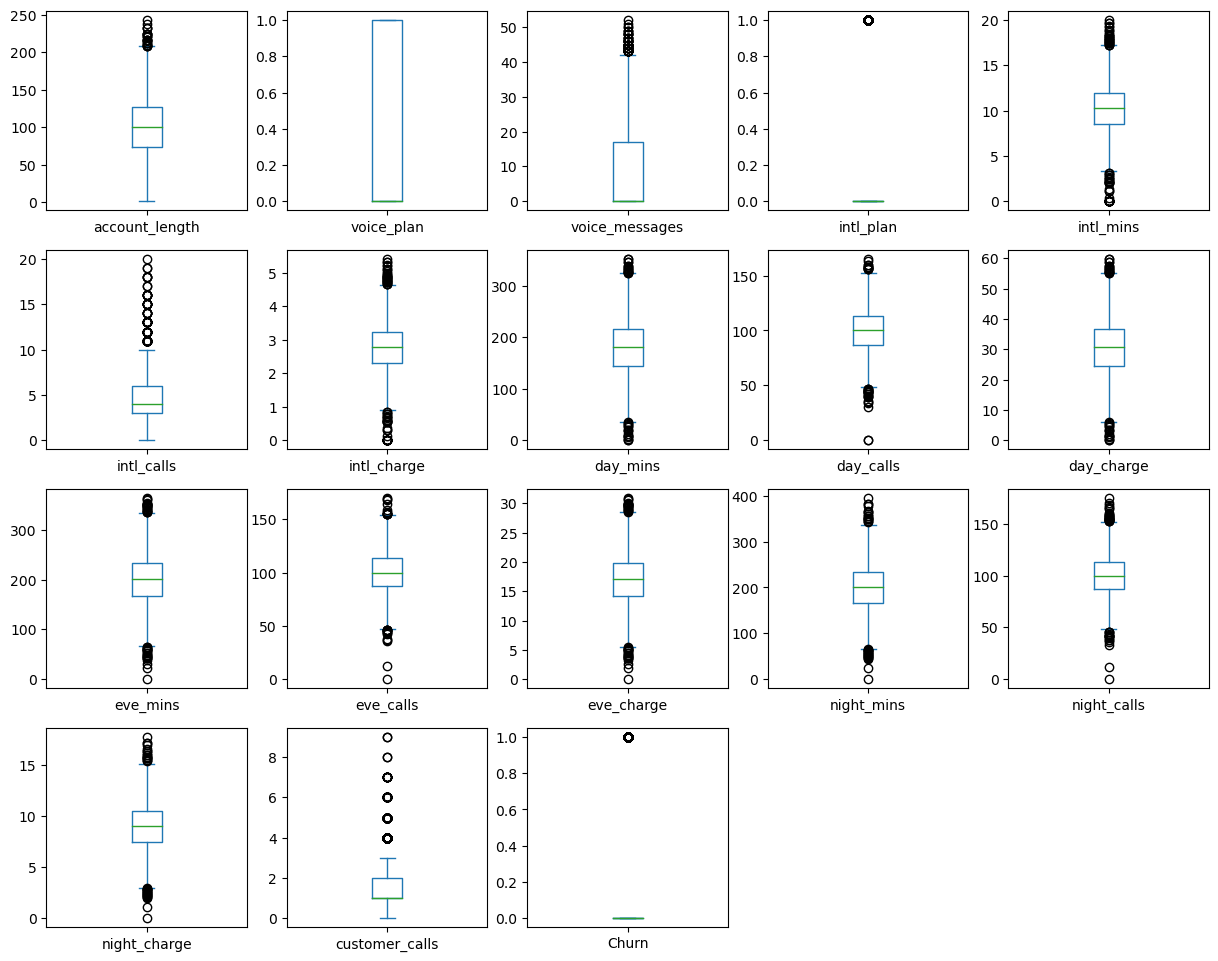

In [25]:
df1.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),sharex=False,sharey=False)
plt.show()

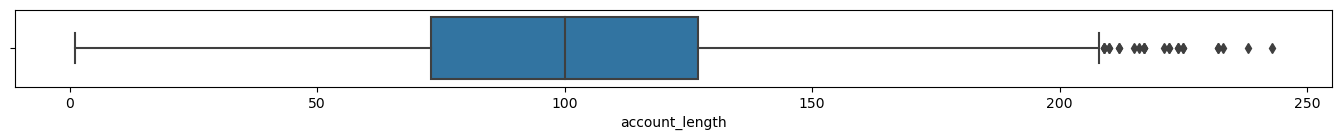

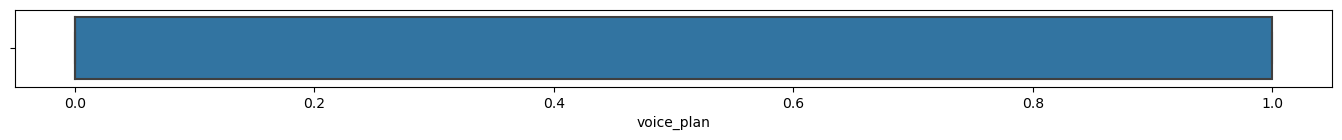

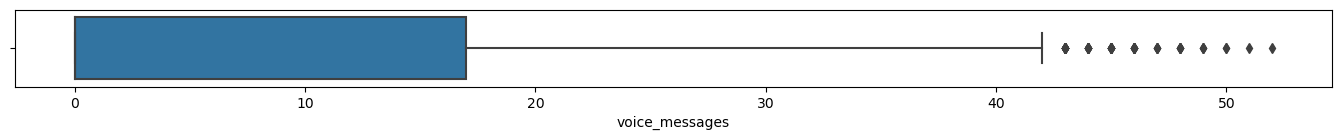

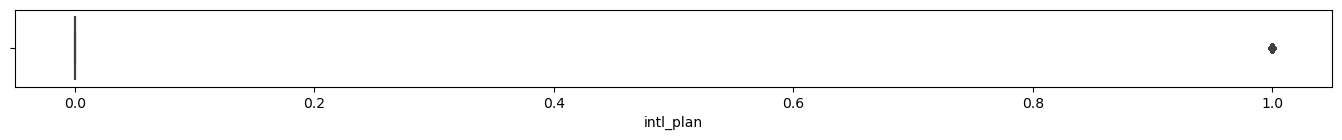

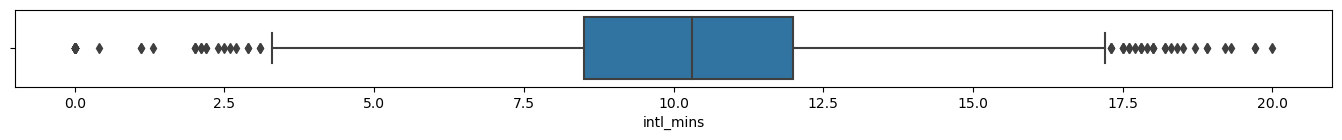

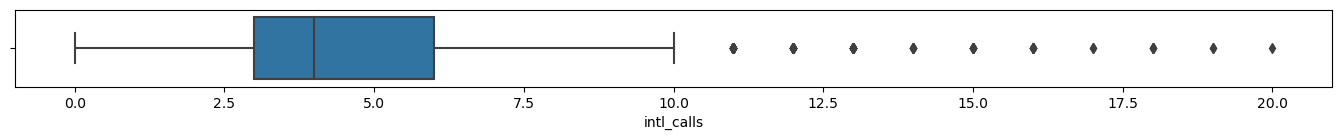

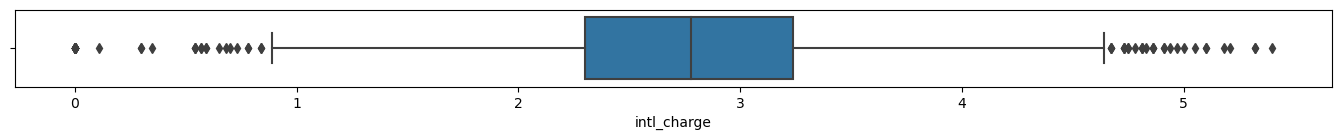

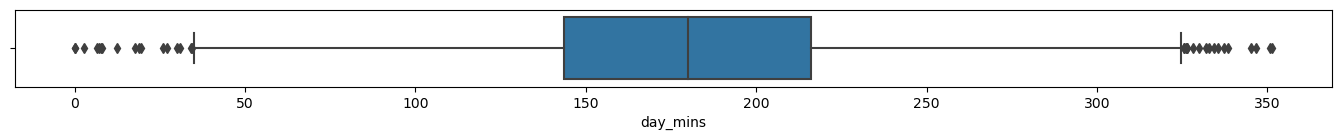

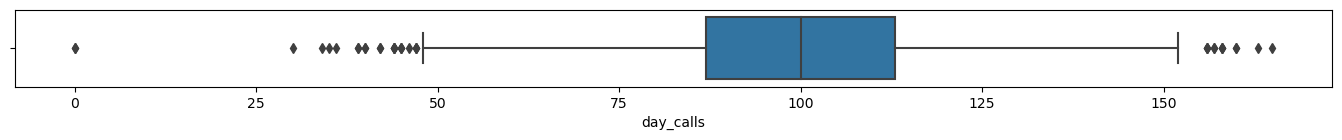

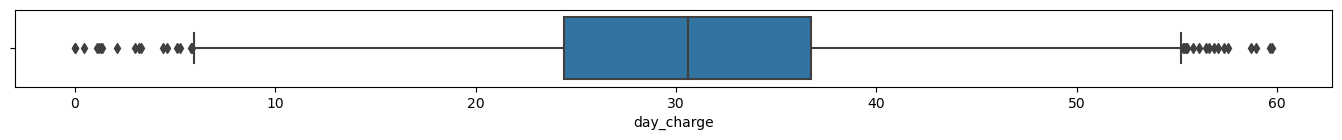

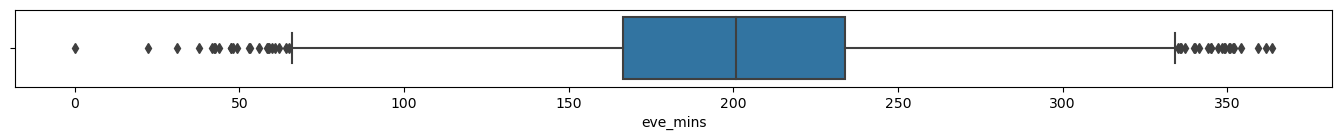

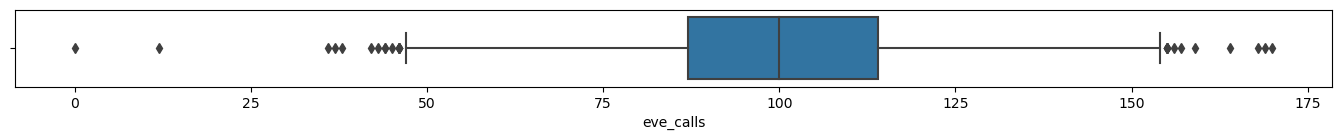

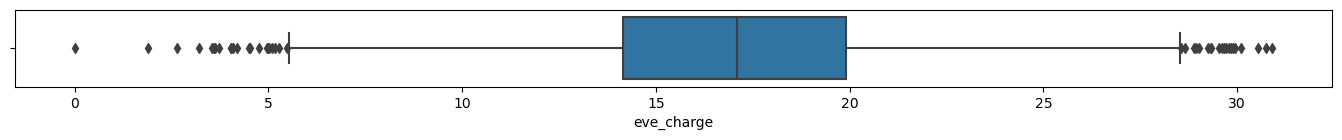

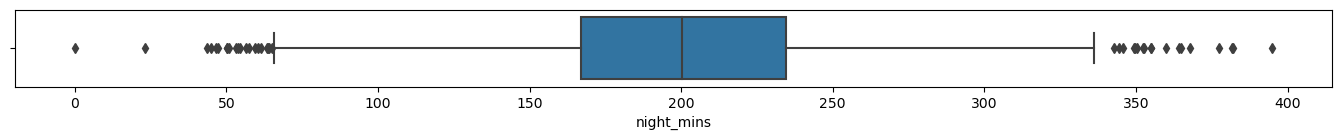

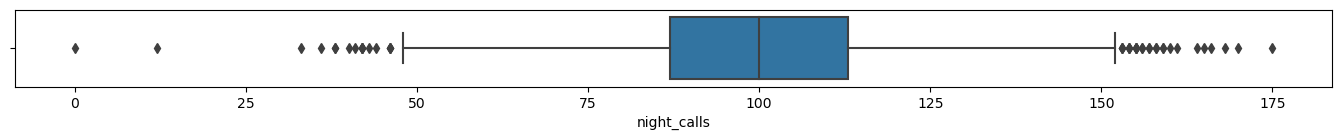

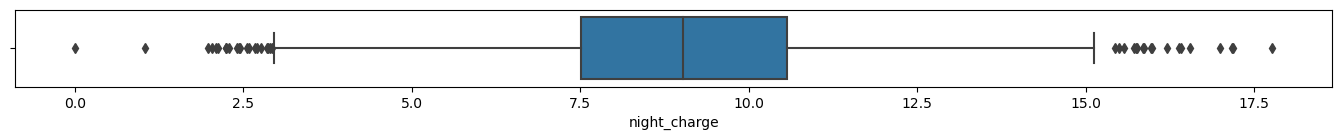

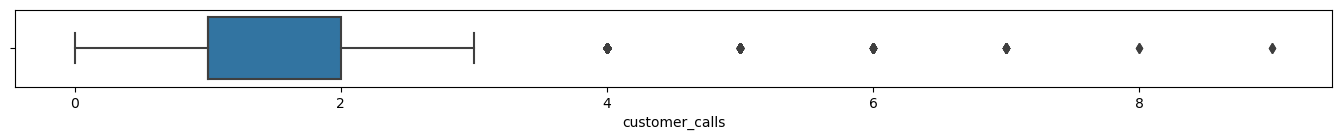

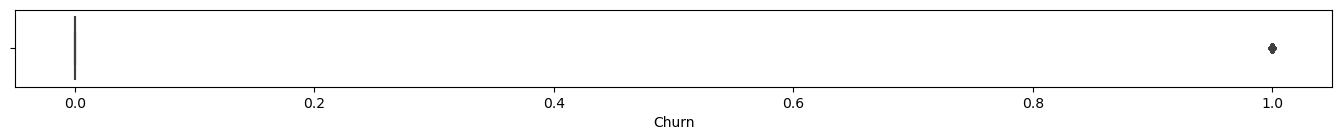

In [26]:
#Printing boxplot for each numerical column present in the data set
df_box=df1.select_dtypes(exclude=['object','bool'])
for column in df_box:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)
plt.show()

Through the box plot, we observe that outliers are present in our data.

array([[<AxesSubplot:title={'center':'account_length'}>,
        <AxesSubplot:title={'center':'voice_plan'}>,
        <AxesSubplot:title={'center':'voice_messages'}>,
        <AxesSubplot:title={'center':'intl_plan'}>],
       [<AxesSubplot:title={'center':'intl_mins'}>,
        <AxesSubplot:title={'center':'intl_calls'}>,
        <AxesSubplot:title={'center':'intl_charge'}>,
        <AxesSubplot:title={'center':'day_mins'}>],
       [<AxesSubplot:title={'center':'day_calls'}>,
        <AxesSubplot:title={'center':'day_charge'}>,
        <AxesSubplot:title={'center':'eve_mins'}>,
        <AxesSubplot:title={'center':'eve_calls'}>],
       [<AxesSubplot:title={'center':'eve_charge'}>,
        <AxesSubplot:title={'center':'night_mins'}>,
        <AxesSubplot:title={'center':'night_calls'}>,
        <AxesSubplot:title={'center':'night_charge'}>],
       [<AxesSubplot:title={'center':'customer_calls'}>,
        <AxesSubplot:title={'center':'Churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]

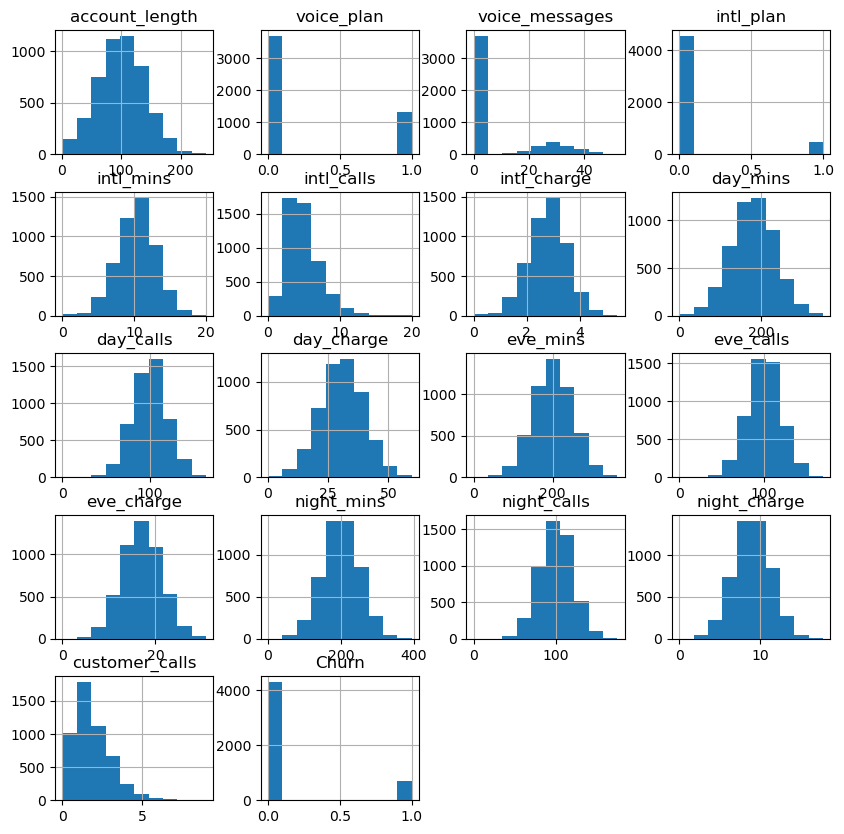

In [27]:
df1.hist(figsize=(10,10))

We observe that almost all the attributes are normally distributed. However, 'customer_calls' and intl_calls' seem to be slightly skewed.

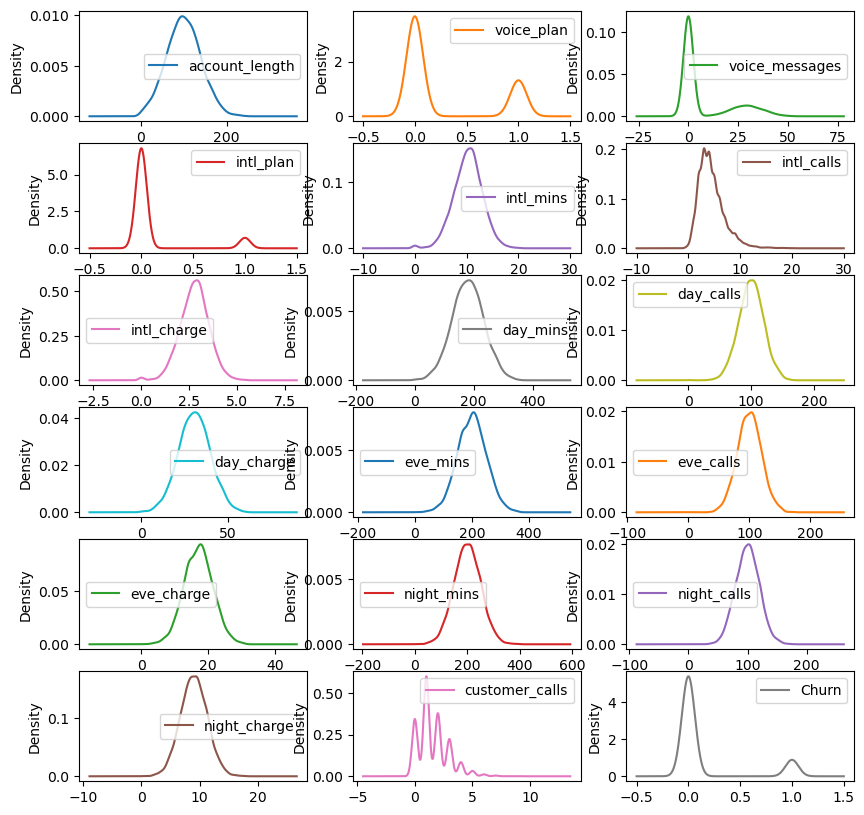

In [28]:
df1.plot(kind='density', subplots=True, layout=(6,3), sharex=False,figsize=(10,10))
plt.show()

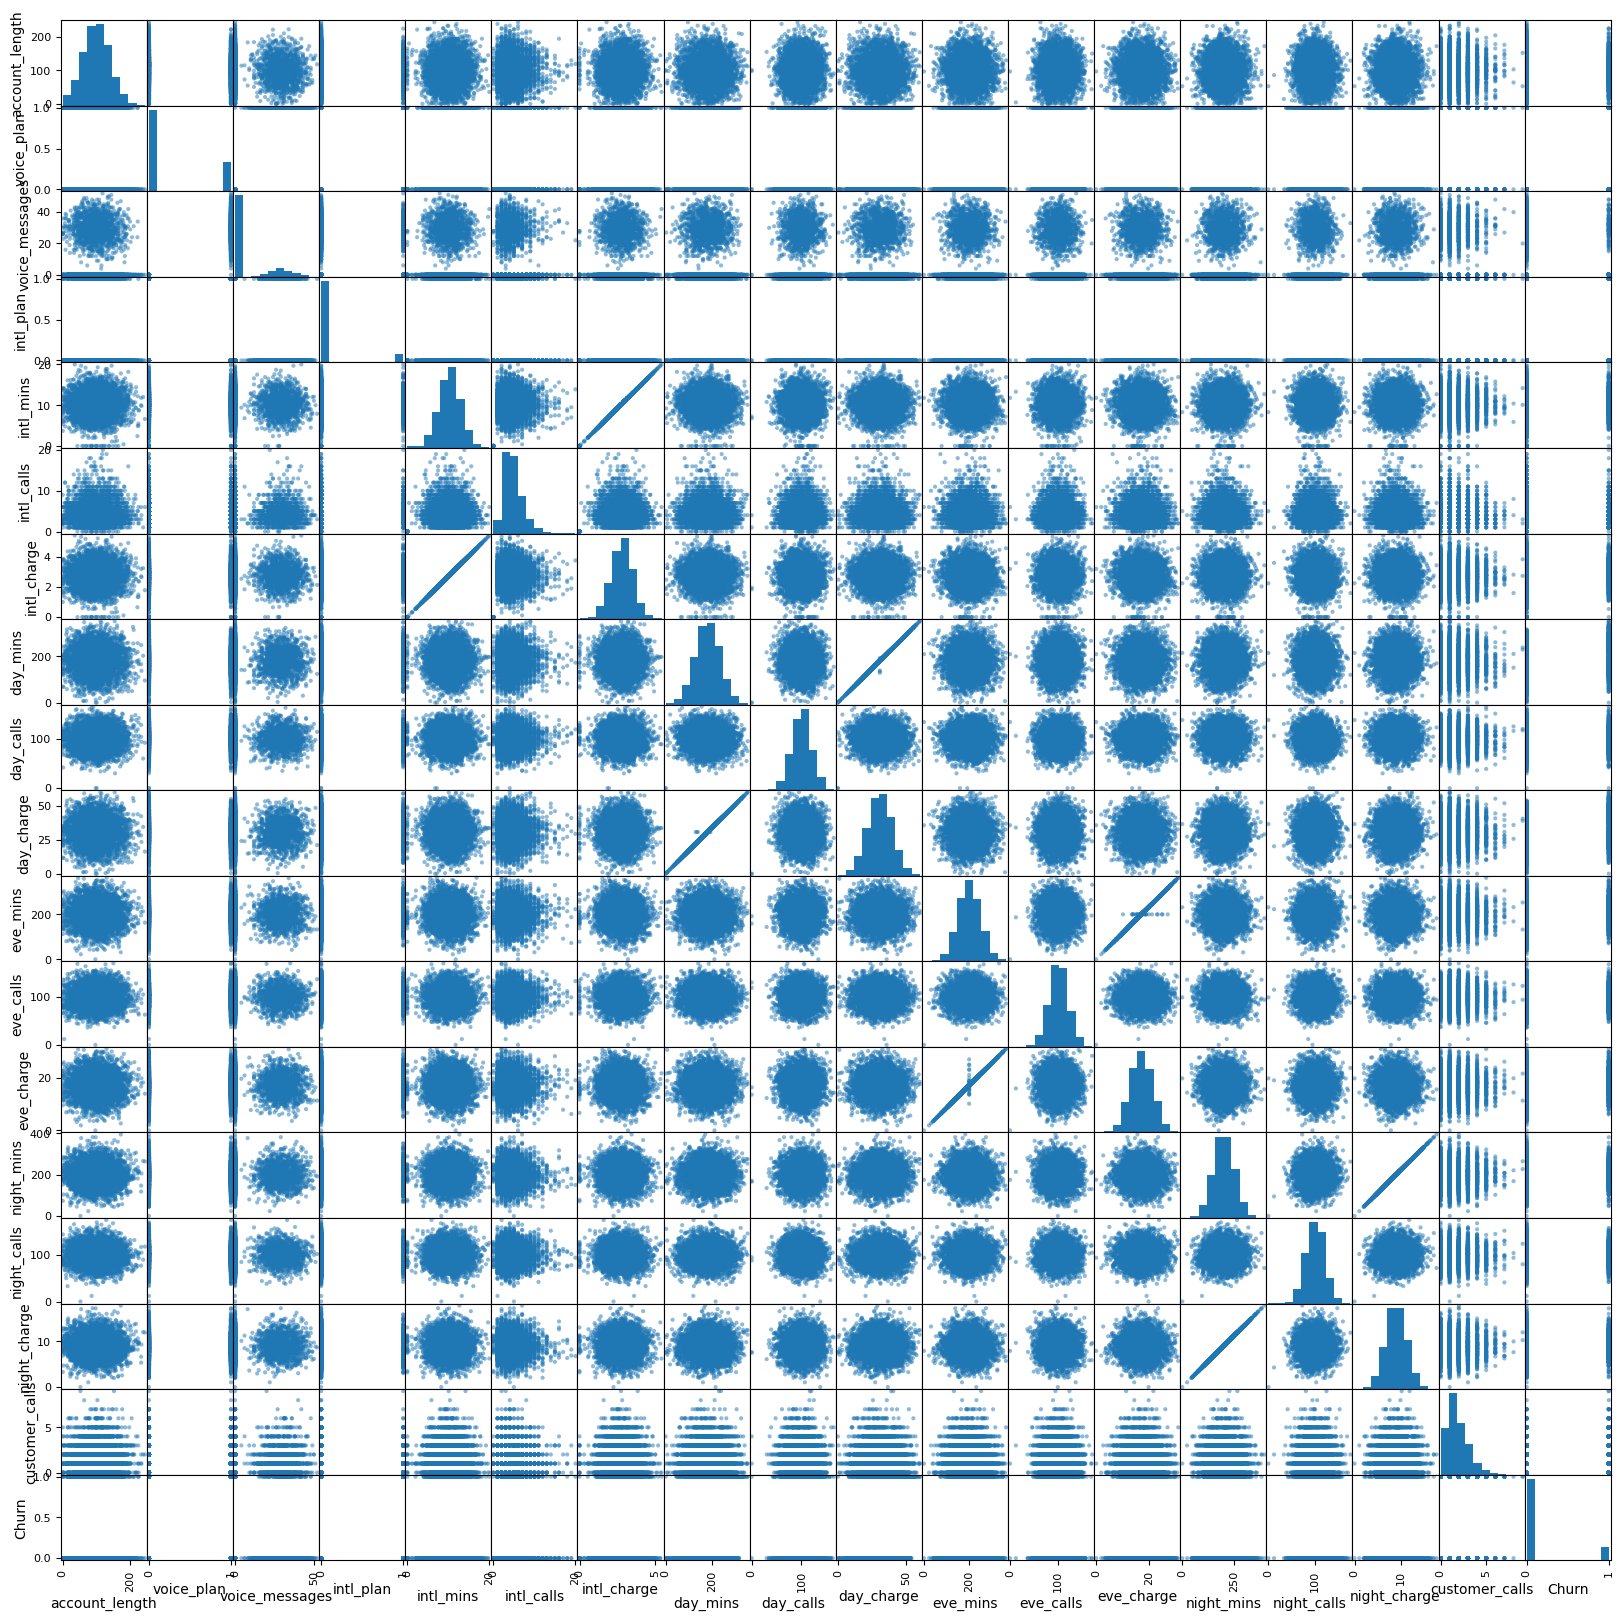

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1,figsize=(20,20))
plt.show()

In [30]:
import plotly.offline as po
import plotly.graph_objs as go
plot_by_churn_labels=df1['Churn'].value_counts().keys().tolist()
plot_by_churn_values=df1['Churn'].value_counts().values.tolist()
plot_data=[
    go.Pie(labels=plot_by_churn_labels,
          values=plot_by_churn_values,
          marker=dict(colors=['Red','Green'],
                     line=dict(color="white",
                              width=1.5)),
          rotation=90,
          hoverinfo="label+value+text",
          hole=.6)
]
plot_layout=go.Layout(dict(title="Customer Churn",
                          plot_bgcolor="rgb(243,243,243)",
                          paper_bgcolor="rgb(243,243,243)",))
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

Out of the total customers, 14.1% seem to churn whereas 85.9% customers decided to continue the service.

<AxesSubplot:xlabel='Churn', ylabel='count'>

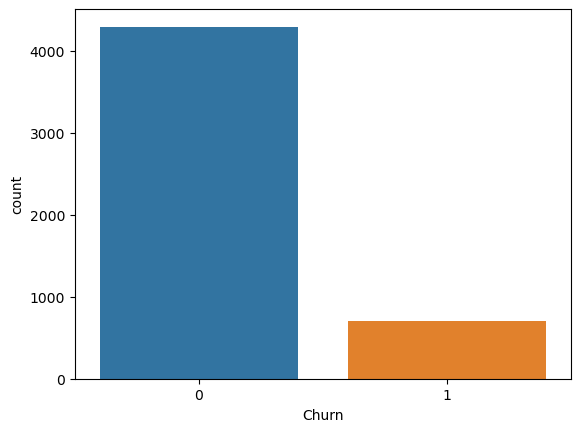

In [31]:
 # countplot
sns.countplot(x=df1.Churn)

Visualizing churn rate by 'State'

In [32]:
df1['State'].value_counts()

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: State, dtype: int64

In [33]:
plot_by_state=df1.groupby('State').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_state['State'],
    y=plot_by_state['Churn'],
    
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by State',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

In [34]:
State_data = pd.crosstab(df1['State'],df1["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn    0   1  Percentage_Churn
State                           
AK      67   5          6.944444
AL     111  13         10.483871
AR      76  16         17.391304
AZ      80   9         10.112360
CA      38  14         26.923077
CO      85  11         11.458333
CT      83  16         16.161616
DC      79   9         10.227273
DE      79  15         15.957447
FL      78  12         13.333333
GA      73  10         12.048193
HI      81   5          5.813953
IA      61   8         11.594203
ID     105  14         11.764706
IL      81   7          7.954545
IN      84  14         14.285714
KS      81  18         18.181818
KY      84  15         15.151515
LA      75   7          8.536585
MA      86  17         16.504854
MD      81  21         20.588235
ME      84  19         18.446602
MI      85  18         17.475728
MN     105  20         16.000000
MO      81  12         12.903226
MS      82  17         17.171717
MT      78  21         21.212121
NC      79  12         13.186813
ND      78

In [35]:
State_data.sort_values('Percentage_Churn')

Churn    0   1  Percentage_Churn
State                           
VA     112   6          5.084746
HI      81   5          5.813953
NE      82   6          6.818182
AK      67   5          6.944444
RI      92   7          7.070707
WI      98   8          7.547170
IL      81   7          7.954545
LA      75   7          8.536585
WY     104  11          9.565217
VT      91  10          9.900990
AZ      80   9         10.112360
DC      79   9         10.227273
PA      69   8         10.389610
AL     111  13         10.483871
NM      81  10         10.989011
ND      78  10         11.363636
CO      85  11         11.458333
IA      61   8         11.594203
ID     105  14         11.764706
GA      73  10         12.048193
NH      83  12         12.631579
MO      81  12         12.903226
OH     101  15         12.931034
NC      79  12         13.186813
FL      78  12         13.333333
WV     136  22         13.924051
SD      73  12         14.117647
UT      96  16         14.285714
IN      84  14         14.285714
KY      84  15         15.151515
TN      75  14         15.730337
OR      96  18         15.789474
DE      79  15         15.957447
MN     105  20         16.000000
CT      83  16         16.161616
MA      86  17         16.504854
MS      82  17         17.171717
AR      76  16         17.391304
MI      85  18         17.475728
NY      94  20         17.543860
SC      75  16         17.582418
OK      74  16         17.777778
KS      81  18         18.181818
ME      84  19         18.446602
NV      73  17         18.888889
MD      81  21         20.588235
MT      78  21         21.212121
TX      90  26         22.413793
WA      74  24         24.489796
NJ      84  28         25.000000
CA      38  14         26.923077

California, NewJeresey, Washington, Texas and Montana are the 5 highest churning states. Whereas Virginia, Hawaii, Nebraska, Alaska and Rhode Island are the 5 least churning states.

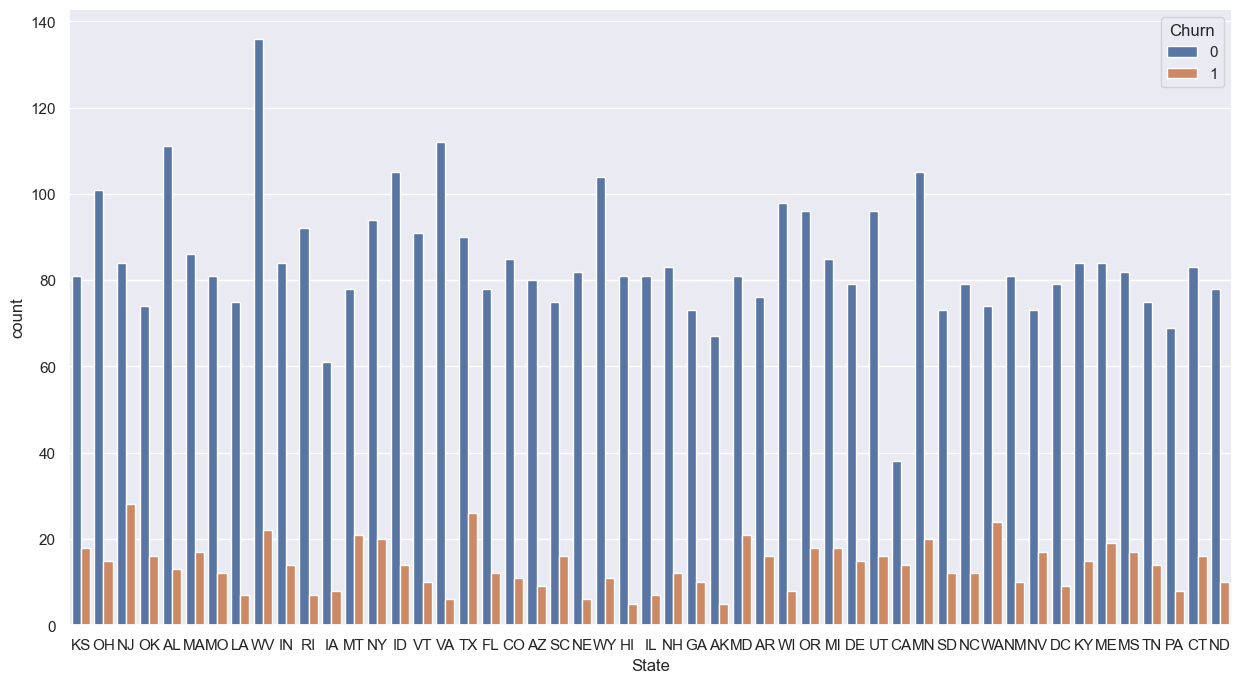

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x="State", hue="Churn", data=df1)
plt.show()

California seems to have the highest churn rate.

Visualizing churn rate by 'area_code'

In [37]:
plot_by_areacode=df1.groupby('area_code').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_areacode['area_code'],
    y=plot_by_areacode['Churn'],
    width=[0.3,0.3,0.3],
    marker=dict(
    color=['red','blue','green'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by area_code',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

From the above graphs, we observe that the attribute 'area_code' does not seem to affect the attribute 'Churn' much.

Visualizing churn rate by 'account length'

In [38]:
churn_df1   = df1[df1["Churn"] == bool(True)]
not_churn_df1= df1[df1["Churn"] == bool(False)]

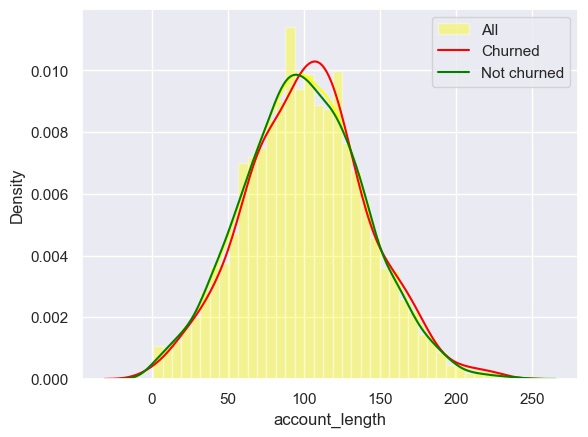

In [39]:
sns.distplot(df1['account_length'],color = 'yellow',label="All")
sns.distplot(churn_df1['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df1['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [40]:
# Customers having account length from 1 to 50 days
df_50=df1[df1.account_length < 51]
df_50

State      area_code  account_length  voice_plan  voice_messages  \
29      MO  area_code_415              20           0               0   
30      HI  area_code_510              49           0               0   
34      AZ  area_code_408              12           0               0   
37      AK  area_code_408              36           1              30   
43      AR  area_code_510              34           0               0   
...    ...            ...             ...         ...             ...   
4940    MN  area_code_408              30           0               0   
4948    OK  area_code_408              50           0               0   
4964    MD  area_code_415              47           1              31   
4967    WV  area_code_510              36           0               0   
4996    HI  area_code_408              50           1              40   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
29            0        6.3           6         1.70     190.0        109   
30            0       11.1           1         3.00     119.3        117   
34            0       11.8           3         3.19     249.6        118   
37            0       14.5           6         3.92     146.3        128   
43            0       10.0           4         2.70     124.8         82   
...         ...        ...         ...          ...       ...        ...   
4940          0       11.3           7         3.05     112.9         81   
4948          0       10.5           5         2.84     198.7        114   
4964          1        9.7           4         2.62     140.6        114   
4967          0        9.5           2         2.57     175.7         69   
4996          0        9.9           5         2.67     235.7        127   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
29         32.30     258.2         84       21.95       181.5          102   
30         20.28     215.1        109       18.28       178.7           90   
34         42.43     252.4        119       21.45       280.2           90   
37         24.87     162.5         80       13.81       129.3          109   
43         21.22     282.2         98       23.99       311.5           78   
...          ...       ...        ...         ...         ...          ...   
4940       19.19     224.8         68       19.11       188.4          122   
4948       33.78     141.5         90       12.03       293.0           79   
4964       23.90     264.6         44       22.49       238.7          121   
4967       29.87     154.8         98       13.16       208.2           68   
4996       40.07     223.0        126       18.96       297.5          116   

      night_charge  customer_calls  Churn  
29            8.17               0      0  
30            8.04               1      0  
34           12.61               1      1  
37            5.82               0      0  
43           14.02               2      0  
...            ...             ...    ...  
4940          8.48               4      1  
4948         13.18               4      0  
4964         10.74               2      0  
4967          9.37               0      0  
4996         13.39               2      0  

[531 rows x 20 columns]

In [41]:
# Class proportion
class_counts_50 = df_50.groupby('Churn').size()
print(class_counts_50)

Churn
0    464
1     67
dtype: int64


In [42]:
df_50.shape

(531, 20)

In [43]:
churn_df_50   = df_50[df_50["Churn"] == bool(True)]
not_churn_df_50= df_50[df_50["Churn"] == bool(False)]

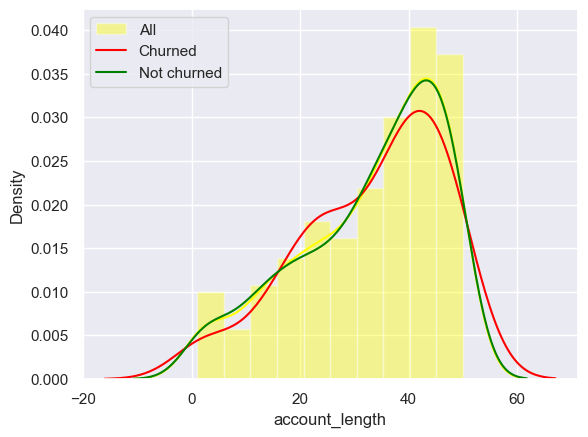

In [44]:
sns.distplot(df_50['account_length'],color = 'yellow',label="All")
sns.distplot(churn_df_50['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df_50['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [45]:
# Customers having account length from 51 to 150 days. 
df_150=df1[(df1['account_length'] < 151) & (df1['account_length'] > 50)]
df_150

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4994    WV  area_code_408              73           0               0   
4995    NC  area_code_408              75           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4994          0       11.5           6         3.11     177.9         89   
4995          0        6.9           7         1.86     170.7        101   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4994       30.24     131.2         82       11.15       186.2           89   
4995       29.02     193.1        126       16.41       129.1          104   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
4             8.86               2      0  
5             8.41               3      0  
...            ...             ...    ...  
4994          8.38               3      0  
4995          5.81               1      0  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[3953 rows x 20 columns]

In [46]:
df_150.shape

(3953, 20)

In [47]:
churn_df_150   = df_150[df_150["Churn"] == bool(True)]
not_churn_df_150= df_150[df_150["Churn"] == bool(False)]

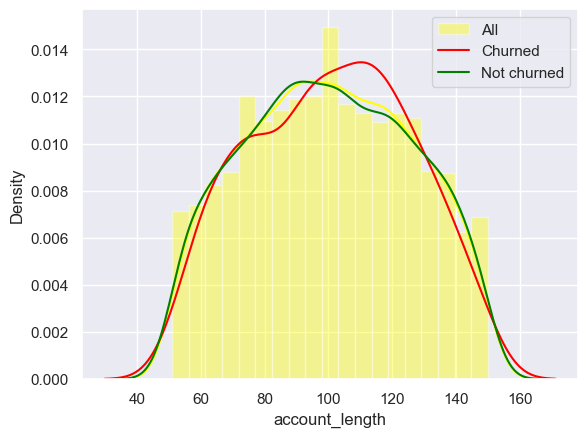

In [48]:
sns.distplot(df_150['account_length'],color = 'yellow',label="All")
sns.distplot(churn_df_150['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df_150['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [49]:
# Customers having account length from 151 to 200 days.
df_200=df1[df1.account_length > 150]
df_200

State      area_code  account_length  voice_plan  voice_messages  \
13      IA  area_code_408             168           0               0   
16      NY  area_code_415             161           0               0   
26      NE  area_code_415             174           0               0   
33      LA  area_code_408             172           0               0   
44      ID  area_code_415             160           0               0   
...    ...            ...             ...         ...             ...   
4921    HI  area_code_408             155           0               0   
4947    CA  area_code_510             175           0               0   
4950    MO  area_code_415             154           0               0   
4951    RI  area_code_415             152           0               0   
4997    WV  area_code_415             152           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
13            0       11.2           2         3.02     128.8         96   
16            0        5.4           9         1.46     332.9         67   
26            0       15.5           5         4.19     124.3         76   
33            0       12.6          10         3.40     212.0        121   
44            0        9.2           4         2.48      85.8         77   
...         ...        ...         ...          ...       ...        ...   
4921          0       11.7          10         3.16     214.2        121   
4947          0        9.6           9         2.59     161.2        121   
4950          0        1.1           5         0.30     162.0         87   
4951          0       11.0           2         2.97     189.5        108   
4997          0       14.7           2         3.97     184.2         90   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
13         30.60     104.9         71        8.92       141.1          128   
16         56.59     317.8         97       27.01       160.6          128   
26         21.13     277.1        112       23.55       250.7          115   
33         36.04      31.2        115        2.65       293.3           78   
44         14.59     165.3        110       14.05       178.5           92   
...          ...       ...        ...         ...         ...          ...   
4921       36.41     199.5         68       16.96       216.8          132   
4947       27.40     136.7        109       11.62       103.3           63   
4950       27.54     199.5        147       16.96       243.0           66   
4951       32.22     218.4         69       18.56       291.1           81   
4997       31.31     256.8         73       21.83       213.6          113   

      night_charge  customer_calls  Churn  
13            6.35               1      0  
16            7.23               4      1  
26           11.28               3      0  
33           13.20               3      0  
44            8.03               3      0  
...            ...             ...    ...  
4921          9.76               3      0  
4947          4.65               1      0  
4950         10.93               1      0  
4951         13.10               3      0  
4997          9.61               3      1  

[516 rows x 20 columns]

In [50]:
df_200.shape

(516, 20)

In [51]:
# Class proportion
class_counts_200 = df_200.groupby('Churn').size()
print(class_counts_200)

Churn
0    435
1     81
dtype: int64


In [52]:
churn_df_200  = df_200[df_200["Churn"] == bool(True)]
not_churn_df_200= df_200[df_200["Churn"] == bool(False)]

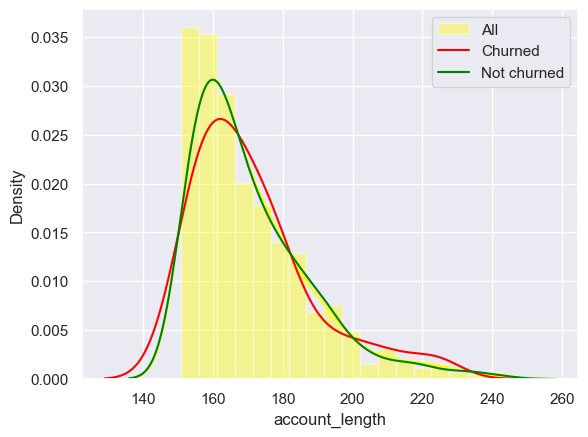

In [53]:
sns.distplot(df_200['account_length'],color = 'yellow',label="All")
sns.distplot(churn_df_200['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df_200['account_length'],color = 'green',hist= False,label="Not churned")
plt.legend()

We cannot define any particular relationship between churn rate and account_length.

Visualizing churn rate by 'intl_plan'

In [54]:
plot_by_intlplan=df1.groupby('intl_plan').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_intlplan['intl_plan'],
    y=plot_by_intlplan['Churn'],
    width=[0.3,0.3,0.3],
    marker=dict(
    color=['red','blue'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by international plan',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='intl_plan', ylabel='count'>

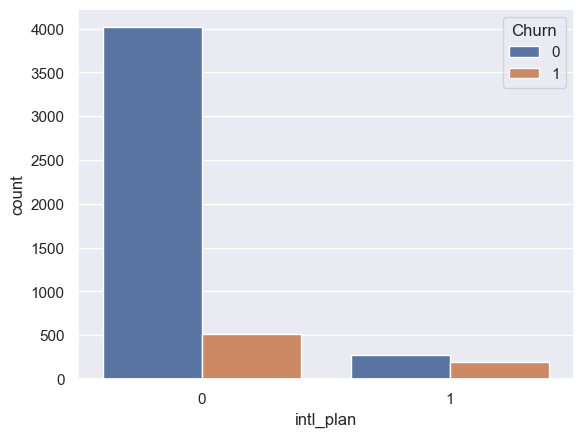

In [55]:
sns.countplot(x='intl_plan',hue="Churn",data =df1)

In [56]:
print ('\n', pd.pivot_table(df1, values='Churn', index=['intl_plan'], aggfunc=[len,np.sum,np.mean]))


             len   sum      mean
          Churn Churn     Churn
intl_plan                      
0          4527   508  0.112216
1           473   199  0.420719


The churn rate for customers who have opted for international plan is 0.423 that is around 42.3% . So, the customers who have opted for international plan are churning faster.

In [57]:
#Customers not opting for intl_plan
df1_no=df1[df1.intl_plan == 0]
df1_no

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
7       MA  area_code_510             121           1              24   
9       LA  area_code_408             117           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
7             0        7.5           7         2.03     218.2         88   
9             0        8.7           4         2.35     184.5         97   
...         ...        ...         ...          ...       ...        ...   
4996          0        9.9           5         2.67     235.7        127   
4997          0       14.7           2         3.97     184.2         90   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
7          37.09     348.5        108       29.62       212.6          118   
9          31.37     351.6         80       29.89       215.8           90   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
7             9.57               3      0  
9             9.71               1      0  
...            ...             ...    ...  
4996         13.39               2      0  
4997          9.61               3      1  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[4527 rows x 20 columns]

In [58]:
df1_no['charge_per_min']=df1_no['intl_charge']/df1_no['intl_mins']

In [59]:
df1_no

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
7       MA  area_code_510             121           1              24   
9       LA  area_code_408             117           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
1             0       10.0           3         2.70     265.1  ...   
2             0       13.7           3         3.70     161.6  ...   
3             0       12.2           5         3.29     243.4  ...   
7             0        7.5           7         2.03     218.2  ...   
9             0        8.7           4         2.35     184.5  ...   
...         ...        ...         ...          ...       ...  ...   
4996          0        9.9           5         2.67     235.7  ...   
4997          0       14.7           2         3.97     184.2  ...   
4998          0       13.6           4         3.67     140.6  ...   
4999          0        8.5           6         2.30     188.8  ...   
5000          0        9.3          16         2.51     129.4  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
7          37.09     348.5        108       29.62       212.6          118   
9          31.37     351.6         80       29.89       215.8           90   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  charge_per_min  
1            11.01               1      0        0.270000  
2            11.45               1      0        0.270073  
3             7.32               0      0        0.269672  
7             9.57               3      0        0.270667  
9             9.71               1      0        0.270115  
...            ...             ...    ...             ...  
4996         13.39               2      0        0.269697  
4997          9.61               3      1        0.270068  
4998          9.56               1      0        0.269853  
4999         10.10               0      0        0.270588  
5000          6.97               0      0        0.269892  

[4527 rows x 21 columns]

<AxesSubplot:xlabel='charge_per_min'>

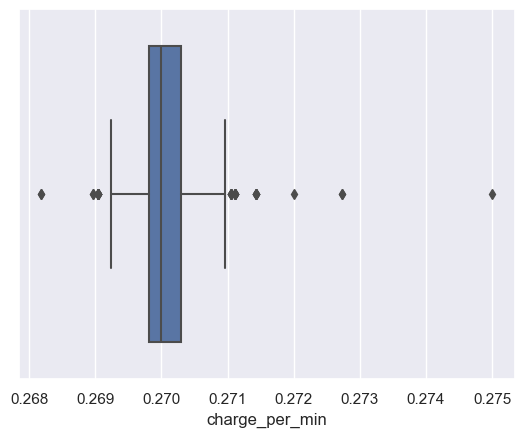

In [60]:
sns.boxplot(df1_no['charge_per_min'])

array([[<AxesSubplot:title={'center':'charge_per_min'}>]], dtype=object)

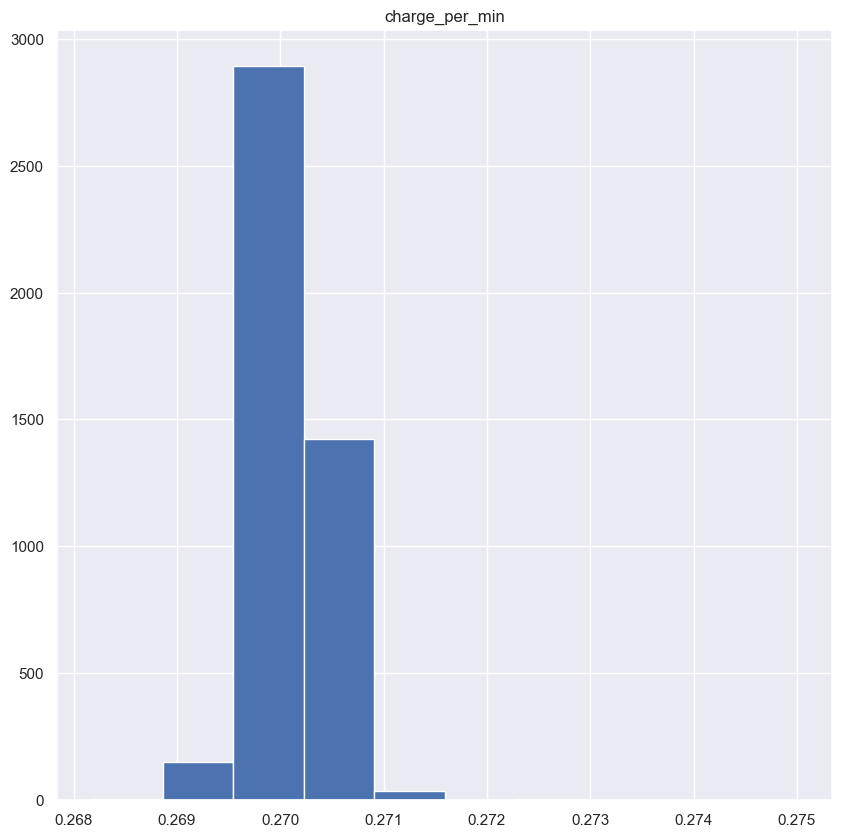

In [61]:
df1_no.hist('charge_per_min',figsize=(10,10))

In [62]:
# Customers opting for intl_plan
df1_yes=df1[df1.intl_plan == 1]
df1_yes

State      area_code  account_length  voice_plan  voice_messages  \
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
6       AL  area_code_510             118           0               0   
8       MO  area_code_415             147           0               0   
10      WV  area_code_415             141           1              37   
...    ...            ...             ...         ...             ...   
4938    WA  area_code_415              62           0               0   
4949    NH  area_code_510             114           1              28   
4960    NM  area_code_408             137           0               0   
4964    MD  area_code_415              47           1              31   
4978    HI  area_code_510              53           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
6             1        6.3           6         1.70     223.4         98   
8             1        7.1           6         1.92     157.0         79   
10            1       11.2           5         3.02     258.6         84   
...         ...        ...         ...          ...       ...        ...   
4938          1        8.6           2         2.32     180.9        121   
4949          1       14.6           4         3.94     136.4         93   
4960          1       10.6           2         2.86     312.4        110   
4964          1        9.7           4         2.62     140.6        114   
4978          1        8.9           5         2.40     145.0         80   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
6          37.98     220.6        101       18.75       203.9          118   
8          26.69     103.1         94        8.76       211.8           96   
10         43.96     222.0        111       18.87       326.4           97   
...          ...       ...        ...         ...         ...          ...   
4938       30.75     134.3        107       11.42       179.3           74   
4949       23.19     170.0         90       14.45       191.5           73   
4960       53.11     231.1         73       19.64       120.1           78   
4964       23.90     264.6         44       22.49       238.7          121   
4978       24.65     228.4         82       19.41       169.4          109   

      night_charge  customer_calls  Churn  
4             8.86               2      0  
5             8.41               3      0  
6             9.18               0      0  
8             9.53               0      0  
10           14.69               0      0  
...            ...             ...    ...  
4938          8.07               2      1  
4949          8.62               2      1  
4960          5.40               1      1  
4964         10.74               2      0  
4978          7.62               0      0  

[473 rows x 20 columns]

In [63]:
df1_yes['charge_per_min']=df1_yes['intl_charge']/df1_yes['intl_mins']

In [64]:
df1_yes

State      area_code  account_length  voice_plan  voice_messages  \
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
6       AL  area_code_510             118           0               0   
8       MO  area_code_415             147           0               0   
10      WV  area_code_415             141           1              37   
...    ...            ...             ...         ...             ...   
4938    WA  area_code_415              62           0               0   
4949    NH  area_code_510             114           1              28   
4960    NM  area_code_408             137           0               0   
4964    MD  area_code_415              47           1              31   
4978    HI  area_code_510              53           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
4             1        6.6           7         1.78     299.4  ...   
5             1       10.1           3         2.73     166.7  ...   
6             1        6.3           6         1.70     223.4  ...   
8             1        7.1           6         1.92     157.0  ...   
10            1       11.2           5         3.02     258.6  ...   
...         ...        ...         ...          ...       ...  ...   
4938          1        8.6           2         2.32     180.9  ...   
4949          1       14.6           4         3.94     136.4  ...   
4960          1       10.6           2         2.86     312.4  ...   
4964          1        9.7           4         2.62     140.6  ...   
4978          1        8.9           5         2.40     145.0  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
6          37.98     220.6        101       18.75       203.9          118   
8          26.69     103.1         94        8.76       211.8           96   
10         43.96     222.0        111       18.87       326.4           97   
...          ...       ...        ...         ...         ...          ...   
4938       30.75     134.3        107       11.42       179.3           74   
4949       23.19     170.0         90       14.45       191.5           73   
4960       53.11     231.1         73       19.64       120.1           78   
4964       23.90     264.6         44       22.49       238.7          121   
4978       24.65     228.4         82       19.41       169.4          109   

      night_charge  customer_calls  Churn  charge_per_min  
4             8.86               2      0        0.269697  
5             8.41               3      0        0.270297  
6             9.18               0      0        0.269841  
8             9.53               0      0        0.270423  
10           14.69               0      0        0.269643  
...            ...             ...    ...             ...  
4938          8.07               2      1        0.269767  
4949          8.62               2      1        0.269863  
4960          5.40               1      1        0.269811  
4964         10.74               2      0        0.270103  
4978          7.62               0      0        0.269663  

[473 rows x 21 columns]

array([[<AxesSubplot:title={'center':'charge_per_min'}>]], dtype=object)

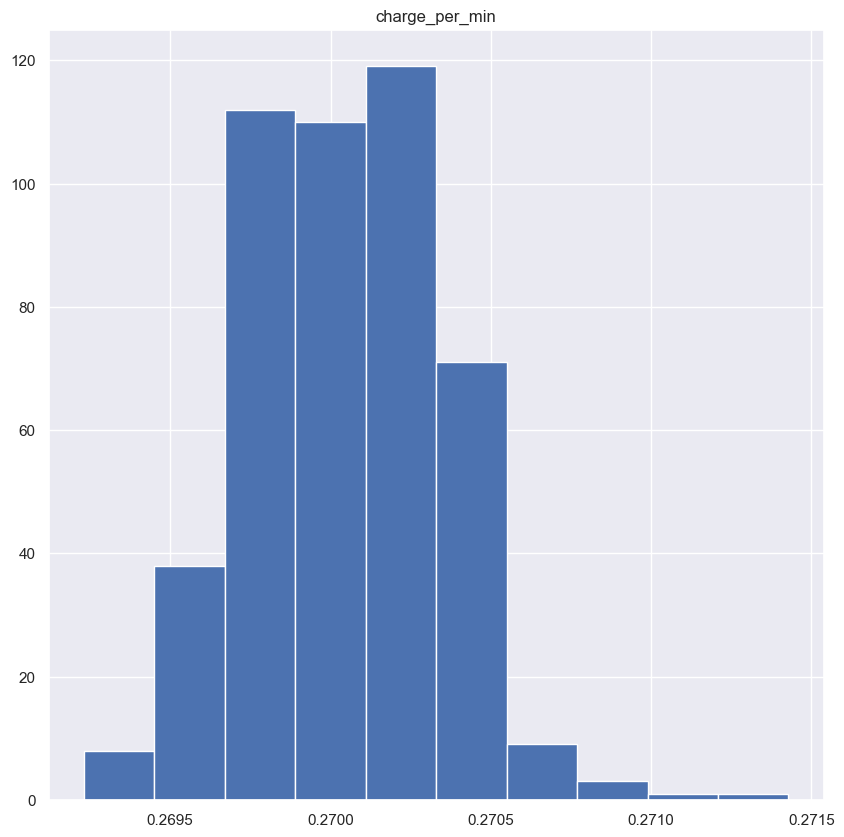

In [65]:
df1_yes.hist('charge_per_min',figsize=(10,10))

<AxesSubplot:xlabel='charge_per_min'>

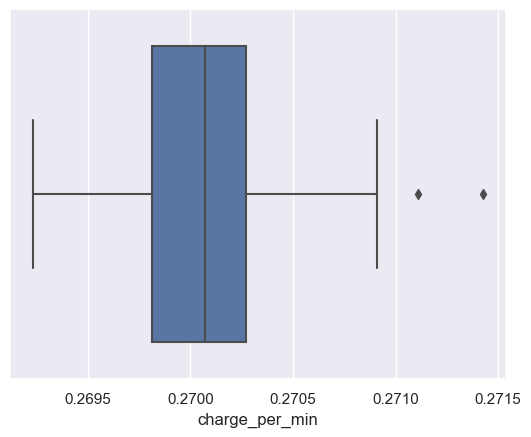

In [66]:
sns.boxplot(df1_yes['charge_per_min'])

Whether the customers are opting or not opting for intl_plan, the charges paid by them per min for international calls is almost same and they all cn make international calls. So, the company must specify and take a look at the services offered under intl_plan.

Visualizing churn rate by 'voice_plan'

In [67]:
plot_by_voiceplan=df1.groupby('voice_plan').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_voiceplan['voice_plan'],
    y=plot_by_voiceplan['Churn'],
    width=[0.3,0.3,0.3],
    marker=dict(
    color=['orange','cyan'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by voice plan',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='voice_plan', ylabel='count'>

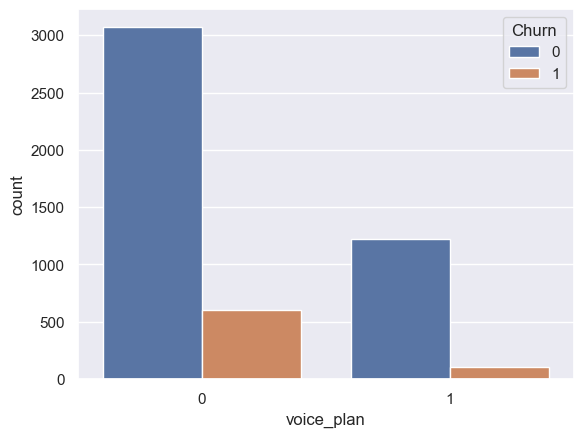

In [68]:
sns.countplot(x='voice_plan',hue="Churn",data = df1)

In [69]:
print ('\n', pd.pivot_table(df1, values='Churn', index=['voice_plan'], aggfunc=[len,np.sum,np.mean]))


              len   sum      mean
           Churn Churn     Churn
voice_plan                      
0           3677   605  0.164536
1           1323   102  0.077098


The customers opting for voice plan seems to churn less than the customers not opting for the voice plan. 

Visualizing churn rate by 'customer_calls'

In [70]:
df1['customer_calls'].value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
9       2
8       2
Name: customer_calls, dtype: int64

In [71]:
plot_by_custcalls=df1.groupby('customer_calls').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_custcalls['customer_calls'],
    y=plot_by_custcalls['Churn'],
    marker=dict(
    color=['pink','blue','green','yellow','red','orange','purple','teal','cyan','brown'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by customer calls',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='customer_calls', ylabel='count'>

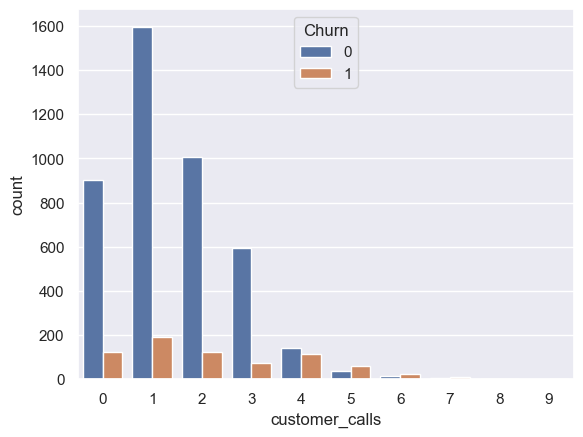

In [72]:
sns.countplot(x='customer_calls',hue="Churn",data = df1)

In [73]:
df_cust_5=df1[df1.customer_calls < 5]
df_cust_5

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996          0        9.9           5         2.67     235.7        127   
4997          0       14.7           2         3.97     184.2         90   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
4             8.86               2      0  
5             8.41               3      0  
...            ...             ...    ...  
4996         13.39               2      0  
4997          9.61               3      1  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[4853 rows x 20 columns]

In [74]:
df_cust_5.shape

(4853, 20)

<AxesSubplot:xlabel='customer_calls', ylabel='count'>

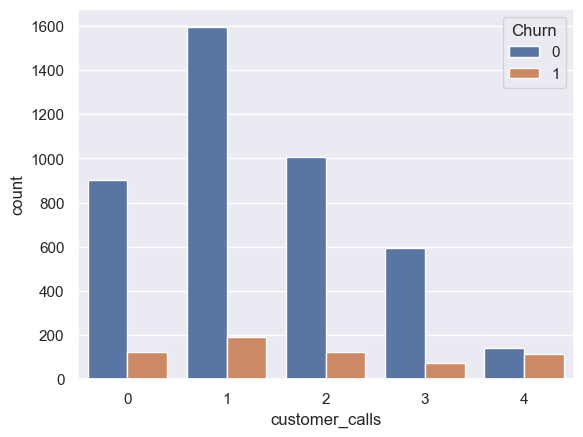

In [75]:
sns.countplot(x='customer_calls',hue="Churn",data = df_cust_5)

In [76]:
df_cust_9=df1[df1.customer_calls > 4]
df_cust_9

State      area_code  account_length  voice_plan  voice_messages  \
22      CO  area_code_408              77           0               0   
49      ID  area_code_415             119           0               0   
55      WY  area_code_415              87           0               0   
137     NY  area_code_415              75           1              21   
155     OK  area_code_415              96           0               0   
...    ...            ...             ...         ...             ...   
4779    NY  area_code_408             102           1              48   
4791    UT  area_code_510             141           0               0   
4832    GA  area_code_415              56           0               0   
4920    NJ  area_code_415              77           0               0   
4983    TX  area_code_408              86           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
22            0        5.7           6         1.54      62.4         89   
49            0        8.8           3         2.38     159.1        114   
55            0        9.7           3         2.62     151.0         83   
137           0        5.3           4         1.43     175.8         97   
155           0       11.5           4         3.11     260.4        115   
...         ...        ...         ...          ...       ...        ...   
4779          0        7.8           4         2.11     134.0         83   
4791          0       14.1           4         3.81     196.5        104   
4832          0       10.1          10         2.73     245.5         39   
4920          1        8.5           3         2.30     323.7        106   
4983          0        5.6           6         1.51     181.1        124   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
22         10.61     169.9        121       14.44       209.6           64   
49         27.05     231.3        117       19.66       143.2           91   
55         25.67     219.7        116       18.67       203.9          127   
137        29.89     217.5        106       18.49       237.5          134   
155        44.27     146.0         46       12.41       269.5           87   
...          ...       ...        ...         ...         ...          ...   
4779       22.78     234.3        128       19.92       197.3          107   
4791       33.41     175.1        111       14.88       209.6          110   
4832       41.74     231.8        116       19.70       156.9           68   
4920       55.03     139.2         99       11.83       204.4           89   
4983       30.79     229.5        105       19.51       122.2           91   

      night_charge  customer_calls  Churn  
22            9.43               5      1  
49            6.44               5      1  
55            9.18               5      1  
137          10.69               5      0  
155          12.13               5      0  
...            ...             ...    ...  
4779          8.88               6      1  
4791          9.43               6      0  
4832          7.06               5      0  
4920          9.20               6      1  
4983          5.50               5      0  

[147 rows x 20 columns]

In [77]:
df_cust_9.head()

State      area_code  account_length  voice_plan  voice_messages  \
22     CO  area_code_408              77           0               0   
49     ID  area_code_415             119           0               0   
55     WY  area_code_415              87           0               0   
137    NY  area_code_415              75           1              21   
155    OK  area_code_415              96           0               0   

     intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
22           0        5.7           6         1.54      62.4         89   
49           0        8.8           3         2.38     159.1        114   
55           0        9.7           3         2.62     151.0         83   
137          0        5.3           4         1.43     175.8         97   
155          0       11.5           4         3.11     260.4        115   

     day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
22        10.61     169.9        121       14.44       209.6           64   
49        27.05     231.3        117       19.66       143.2           91   
55        25.67     219.7        116       18.67       203.9          127   
137       29.89     217.5        106       18.49       237.5          134   
155       44.27     146.0         46       12.41       269.5           87   

     night_charge  customer_calls  Churn  
22           9.43               5      1  
49           6.44               5      1  
55           9.18               5      1  
137         10.69               5      0  
155         12.13               5      0

In [78]:
df_cust_9.shape

(147, 20)

<AxesSubplot:xlabel='customer_calls', ylabel='count'>

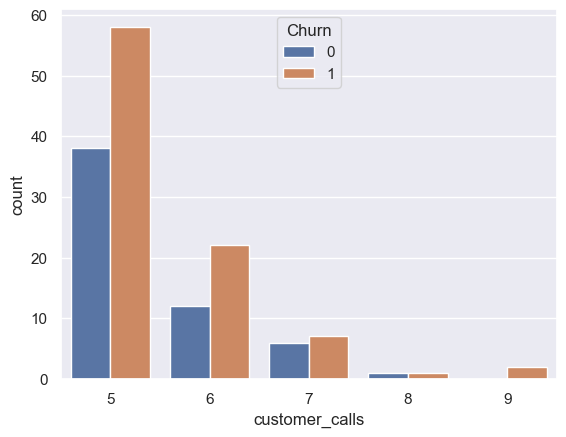

In [79]:
sns.countplot(x='customer_calls',hue="Churn",data = df_cust_9)

It is observed that the customers making more calls to customer service seems to churn more. Also, the customers making only one call also seem to churn indicating that their issue might not be solved by the customer service.

<AxesSubplot:xlabel='customer_calls', ylabel='count'>

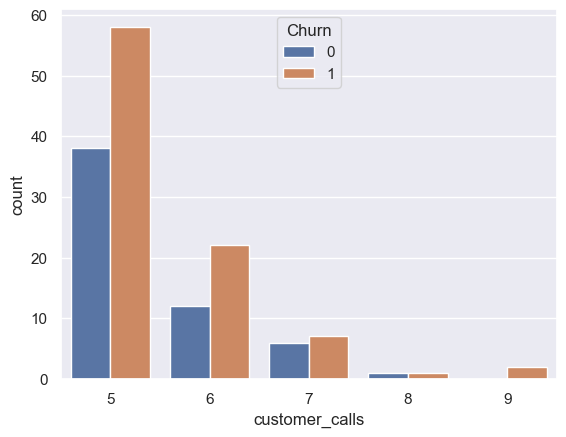

In [80]:
sns.countplot(x='customer_calls',hue="Churn",data =df_cust_9)

In [81]:
plot_by_custcall=df_cust_9.groupby('customer_calls').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_custcall['customer_calls'],
    y=plot_by_custcall['Churn'],
    marker=dict(
    color=['red','blue','green','purple','orange'])
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by customer calls',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

Visualizing churn rate by 'day_charges'

In [82]:
plot_by_daycharge=df1.groupby('day_charge').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_daycharge['day_charge'],
    y=plot_by_daycharge['Churn'],
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by day charges',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='day_mins', ylabel='day_charge'>

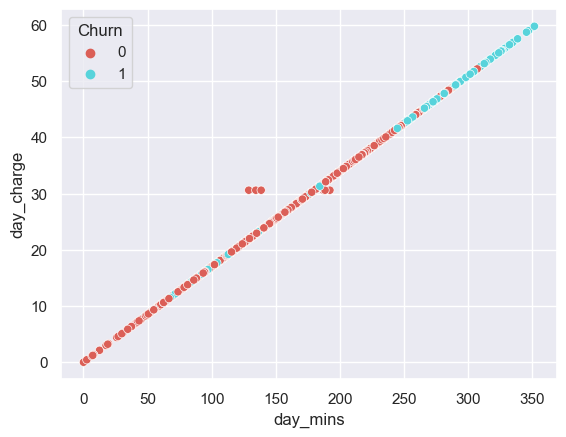

In [83]:
sns.scatterplot(x="day_mins", y="day_charge", hue="Churn", data=df1,palette='hls')

Visualizing churn rate by 'intl_charges'

In [84]:

plot_by_intlcharge=df1.groupby('intl_charge').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_intlcharge['intl_charge'],
    y=plot_by_intlcharge['Churn'],
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by international charges',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='intl_mins', ylabel='intl_charge'>

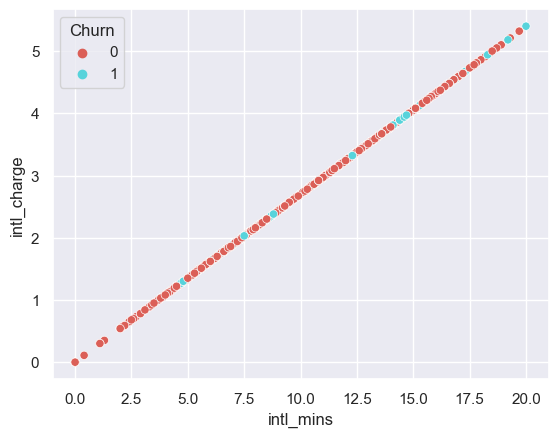

In [85]:
sns.scatterplot(x="intl_mins", y="intl_charge", hue="Churn", data=df1,palette='hls')

Visualizing churn rate by 'night_charges'

In [86]:
plot_by_nightcharge=df1.groupby('night_charge').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_nightcharge['night_charge'],
    y=plot_by_nightcharge['Churn'],
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by night charges',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='night_mins', ylabel='night_charge'>

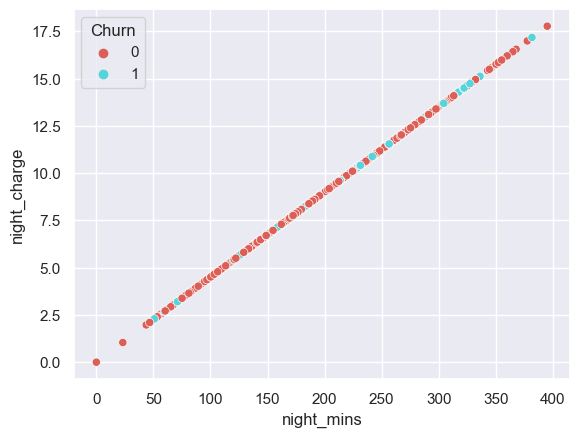

In [87]:
sns.scatterplot(x="night_mins", y="night_charge", hue="Churn", data=df1,palette='hls')

Visualizing churn rate by 'eve_charges'

In [88]:
plot_by_evecharge=df1.groupby('eve_charge').Churn.mean().reset_index()
plot_data=[
    go.Bar(
    x=plot_by_evecharge['eve_charge'],
    y=plot_by_intlcharge['Churn'],
    )
]
plot_layout=go.Layout(
    xaxis={"type":"category"},
    yaxis={"title":"Churn Rate"},
    title='Churn Rate by evening charges',
    plot_bgcolor='rgb(243,243,243)',
    paper_bgcolor='rgb(243,243,243)',
)
fig=go.Figure(data=plot_data,layout=plot_layout)
po.iplot(fig)

<AxesSubplot:xlabel='eve_mins', ylabel='eve_charge'>

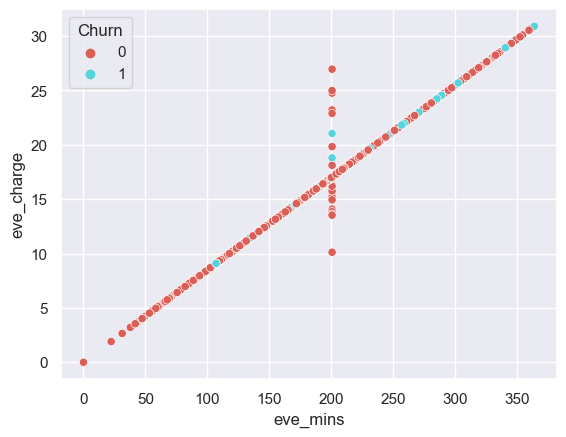

In [89]:
sns.scatterplot(x="eve_mins", y="eve_charge", hue="Churn", data=df1,palette='hls')

From the above bar plots, it is observed that higher the charges higher is the churn rate.

Relation between overall call charge and overall call minutes

In [90]:
day_charge_perm = df1['day_charge'].mean()/df1['day_mins'].mean()
eve_charge_perm = df1['eve_charge'].mean()/df1['eve_mins'].mean()
night_charge_perm = df1['night_charge'].mean()/df1['night_mins'].mean()
intl_charge_perm= df1['intl_charge'].mean()/df1['intl_mins'].mean()

<AxesSubplot:>

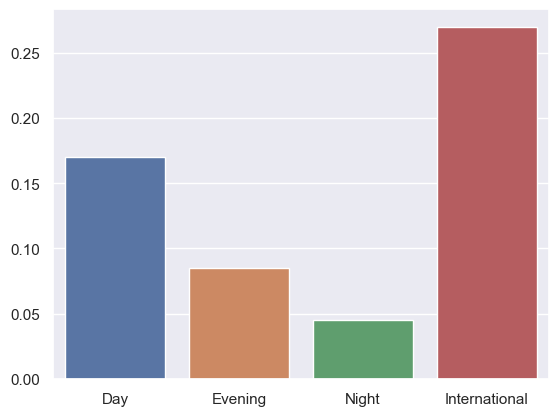

In [91]:
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,intl_charge_perm])

It is observed that as International charges are very high as compared to other charges,it might be one of the reasons that the customers opting for international plan are churning at a higher rate.

### Relating churn rate by number of calls made.

International calls

In [92]:
print(df1.groupby(["Churn"])['intl_calls'].mean())

Churn
0    4.481947
1    4.151344
Name: intl_calls, dtype: float64


In [93]:
print(df1.groupby(["Churn"])['intl_mins'].mean())

Churn
0    10.190869
1    10.692362
Name: intl_mins, dtype: float64


In [94]:
print(df1.groupby(["Churn"])['intl_charge'].mean())

Churn
0    2.752055
1    2.887426
Name: intl_charge, dtype: float64


day calls

In [95]:
print(df1.groupby(["Churn"])['day_calls'].mean())

Churn
0     99.899604
1    100.817539
Name: day_calls, dtype: float64


In [96]:
print(df1.groupby(["Churn"])['day_mins'].mean())

Churn
0    175.746564
1    207.870580
Name: day_mins, dtype: float64


In [97]:
print(df1.groupby(["Churn"])['day_charge'].mean())

Churn
0    29.881870
1    35.338416
Name: day_charge, dtype: float64


Evening calls

In [98]:
print(df1.groupby(["Churn"])['eve_calls'].mean())

Churn
0    100.241556
1     99.884017
Name: eve_calls, dtype: float64


In [99]:
print(df1.groupby(["Churn"])['eve_mins'].mean())

Churn
0    198.754880
1    211.661952
Name: eve_mins, dtype: float64


In [100]:
print(df1.groupby(["Churn"])['eve_charge'].mean())

Churn
0    16.898654
1    17.999562
Name: eve_charge, dtype: float64


Night Calls

In [101]:
print(df1.groupby(["Churn"])['night_calls'].mean())

Churn
0    99.975775
1    99.575672
Name: night_calls, dtype: float64


In [102]:
print(df1.groupby(["Churn"])['night_mins'].mean())

Churn
0    199.455113
1    206.078218
Name: night_mins, dtype: float64


In [103]:
print(df1.groupby(["Churn"])['night_charge'].mean())

Churn
0    8.975593
1    9.273607
Name: night_charge, dtype: float64


Correlation

In [104]:
correlation=df1.corr(method='pearson')
correlation

account_length  voice_plan  voice_messages  intl_plan  \
account_length        1.000000   -0.006650       -0.014575   0.014681   
voice_plan           -0.006650    1.000000        0.954508   0.009054   
voice_messages       -0.014575    0.954508        1.000000   0.011947   
intl_plan             0.014681    0.009054        0.011947   1.000000   
intl_mins             0.001291    0.004116        0.002463   0.031799   
intl_calls            0.014277   -0.007525        0.000124   0.004493   
intl_charge           0.001292    0.004165        0.002505   0.031751   
day_mins             -0.001017    0.002059        0.005381   0.028138   
day_calls             0.028240   -0.001735        0.000883   0.008102   
day_charge           -0.000798    0.001810        0.005143   0.028015   
eve_mins             -0.008690    0.022976        0.018861   0.019941   
eve_calls             0.009143   -0.005916       -0.003954   0.002505   
eve_charge           -0.009587    0.023332        0.019496   0.021234   
night_mins            0.000668    0.005524        0.005541  -0.026508   
night_calls          -0.007825    0.009176        0.002676   0.005623   
night_charge          0.000656    0.005522        0.005535  -0.026510   
customer_calls       -0.001445   -0.014453       -0.007086  -0.012974   
Churn                 0.021203   -0.110698       -0.097633   0.259123   

                intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
account_length   0.001291    0.014277     0.001292 -0.001017   0.028240   
voice_plan       0.004116   -0.007525     0.004165  0.002059  -0.001735   
voice_messages   0.002463    0.000124     0.002505  0.005381   0.000883   
intl_plan        0.031799    0.004493     0.031751  0.028138   0.008102   
intl_mins        1.000000    0.016791     0.999993 -0.019486   0.013097   
intl_calls       0.016791    1.000000     0.016900 -0.001303   0.010893   
intl_charge      0.999993    0.016900     1.000000 -0.019415   0.013161   
day_mins        -0.019486   -0.001303    -0.019415  1.000000   0.001935   
day_calls        0.013097    0.010893     0.013161  0.001935   1.000000   
day_charge      -0.019283   -0.001597    -0.019213  0.999769   0.001667   
eve_mins        -0.000344    0.007985    -0.000321 -0.010907  -0.001725   
eve_calls       -0.007458    0.005574    -0.007507  0.008128   0.003754   
eve_charge       0.000132    0.008393     0.000155 -0.010760  -0.000695   
night_mins      -0.006721   -0.017214    -0.006655  0.011799   0.002804   
night_calls      0.000391   -0.000156     0.000368  0.004236  -0.008308   
night_charge    -0.006717   -0.017182    -0.006650  0.011783   0.002802   
customer_calls  -0.012122   -0.019147    -0.012180  0.002733  -0.010739   
Churn            0.063285   -0.046893     0.063275  0.207705   0.016130   

                day_charge  eve_mins  eve_calls  eve_charge  night_mins  \
account_length   -0.000798 -0.008690   0.009143   -0.009587    0.000668   
voice_plan        0.001810  0.022976  -0.005916    0.023332    0.005524   
voice_messages    0.005143  0.018861  -0.003954    0.019496    0.005541   
intl_plan         0.028015  0.019941   0.002505    0.021234   -0.026508   
intl_mins        -0.019283 -0.000344  -0.007458    0.000132   -0.006721   
intl_calls       -0.001597  0.007985   0.005574    0.008393   -0.017214   
intl_charge      -0.019213 -0.000321  -0.007507    0.000155   -0.006655   
day_mins          0.999769 -0.010907   0.008128   -0.010760    0.011799   
day_calls         0.001667 -0.001725   0.003754   -0.000695    0.002804   
day_charge        1.000000 -0.011530   0.007983   -0.011382    0.011319   
eve_mins         -0.011530  1.000000   0.003109    0.997660   -0.016501   
eve_calls         0.007983  0.003109   1.000000    0.002778    0.001781   
eve_charge       -0.011382  0.997660   0.002778    1.000000   -0.016649   
night_mins        0.011319 -0.016501   0.001781   -0.016649    1.000000   
night_calls       0.004207  0.015593  -0.013682    0.013422    0.026972   
ni

<AxesSubplot:>

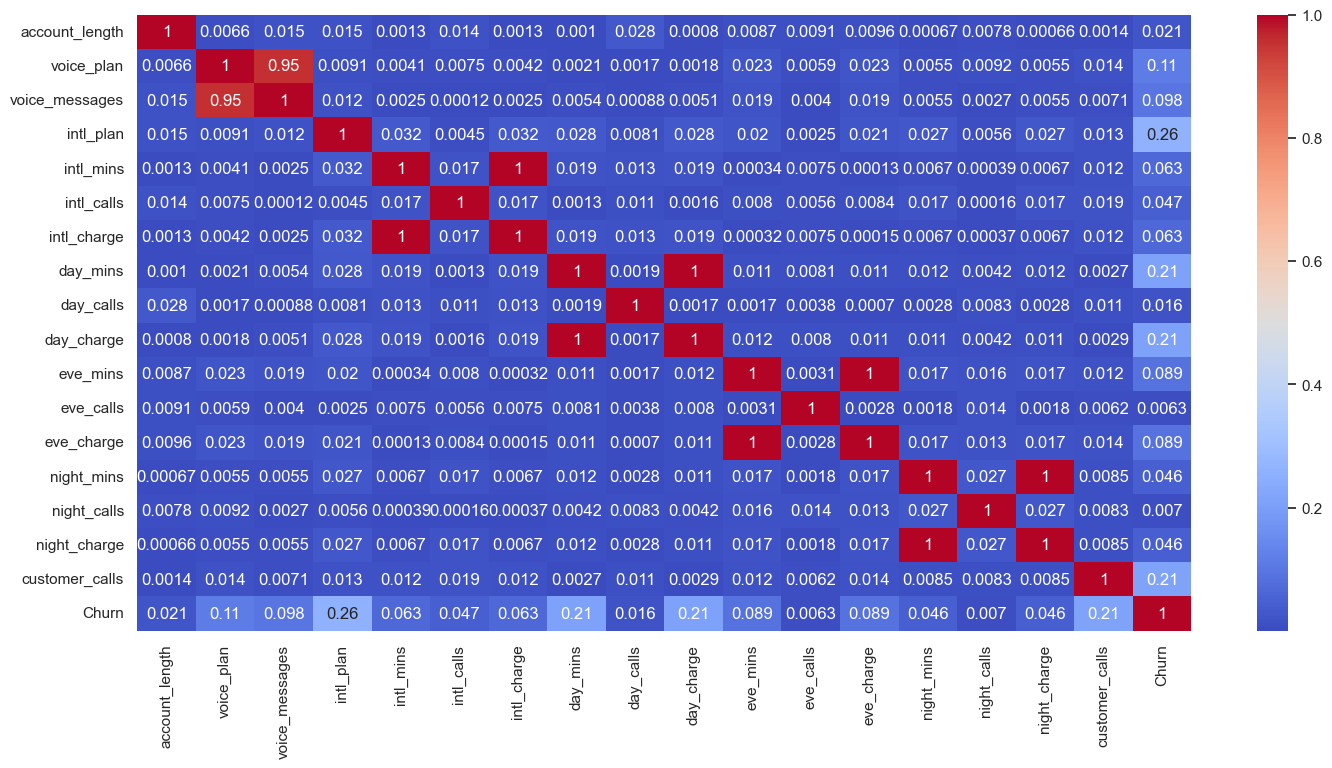

In [105]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From the correlation matrix and the heat map, it is an obvious observation that the attributes

1)'intl_mins', 'intl_charge'

2)'day_mins', 'day_charge'

3)'eve_mins', 'eve_charge'

4)'night_mins', 'night_charge'

5)'voice_msg',' voice_plan'

are highly correlated with each other.

<AxesSubplot:>

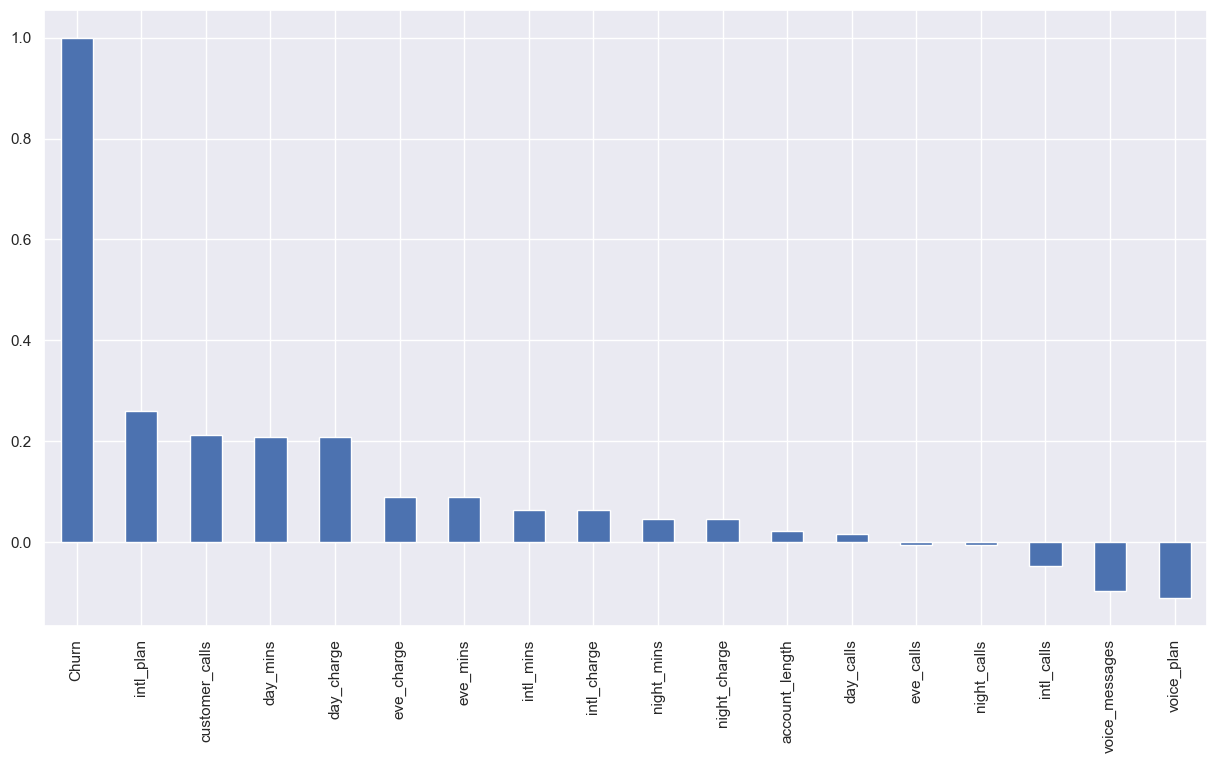

In [106]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Feature Engineering

In [107]:
df1.describe()

account_length   voice_plan  voice_messages    intl_plan    intl_mins  \
count      5000.00000  5000.000000     5000.000000  5000.000000  5000.000000   
mean        100.25860     0.264600        7.755200     0.094600    10.261780   
std          39.69456     0.441164       13.546393     0.292691     2.761396   
min           1.00000     0.000000        0.000000     0.000000     0.000000   
25%          73.00000     0.000000        0.000000     0.000000     8.500000   
50%         100.00000     0.000000        0.000000     0.000000    10.300000   
75%         127.00000     1.000000       17.000000     0.000000    12.000000   
max         243.00000     1.000000       52.000000     1.000000    20.000000   

        intl_calls  intl_charge     day_mins    day_calls   day_charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      4.435200     2.771196   180.288900   100.029400    30.653426   
std       2.456788     0.745514    53.894699    19.831197     9.159936   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.300000   143.700000    87.000000    24.430000   
50%       4.000000     2.780000   180.100000   100.000000    30.600000   
75%       6.000000     3.240000   216.200000   113.000000    36.750000   
max      20.000000     5.400000   351.500000   165.000000    59.760000   

          eve_mins    eve_calls   eve_charge   night_mins  night_calls  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    200.579940   100.191000    17.054322   200.391620    99.919200   
std      50.433136    19.826496     4.296843    50.527789    19.958686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     166.600000    87.000000    14.140000   166.900000    87.000000   
50%     200.800000   100.000000    17.090000   200.400000   100.000000   
75%     233.900000   114.000000    19.900000   234.700000   113.000000   
max     363.700000   170.000000    30.910000   395.000000   175.000000   

       night_charge  customer_calls        Churn  
count   5000.000000     5000.000000  5000.000000  
mean       9.017732        1.570400     0.141400  
std        2.273763        1.306363     0.348469  
min        0.000000        0.000000     0.000000  
25%        7.510000        1.000000     0.000000  
50%        9.020000        1.000000     0.000000  
75%       10.560000        2.000000     0.000000  
max       17.770000        9.000000     1.000000

We observe that all the attributes are having different range that differs vastly. So it will be better to rescale the data using minmax scaler before model building. We can also use Standard Scaler for this purpose, but it might introduce a negative value in our data which will make it a bit complicated,so we will go with minmax scaler instead.

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   int64  
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   int64  
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   float64
 12  eve_mins        5000 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

In [109]:
df3=df1.copy()

In [110]:
df3

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996          0        9.9           5         2.67     235.7        127   
4997          0       14.7           2         3.97     184.2         90   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
4             8.86               2      0  
5             8.41               3      0  
...            ...             ...    ...  
4996         13.39               2      0  
4997          9.61               3      1  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[5000 rows x 20 columns]

In [111]:
df1

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996          0        9.9           5         2.67     235.7        127   
4997          0       14.7           2         3.97     184.2         90   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
4             8.86               2      0  
5             8.41               3      0  
...            ...             ...    ...  
4996         13.39               2      0  
4997          9.61               3      1  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[5000 rows x 20 columns]

In [112]:
df3.columns

Index(['State', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'Churn'],
      dtype='object')

In [113]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
cols_scal=['account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls']
df3[cols_scal]=scaler.fit_transform(df3[cols_scal])

In [114]:
df3.head()

State      area_code  account_length  voice_plan  voice_messages  intl_plan  \
1    KS  area_code_415        0.524793         1.0        0.480769        0.0   
2    OH  area_code_415        0.438017         1.0        0.500000        0.0   
3    NJ  area_code_415        0.561983         0.0        0.000000        0.0   
4    OH  area_code_408        0.342975         0.0        0.000000        1.0   
5    OK  area_code_415        0.305785         0.0        0.000000        1.0   

   intl_mins  intl_calls  intl_charge  day_mins  day_calls  day_charge  \
1      0.500        0.15     0.500000  0.754196   0.666667    0.754183   
2      0.685        0.15     0.685185  0.459744   0.745455    0.459672   
3      0.610        0.25     0.609259  0.692461   0.690909    0.692436   
4      0.330        0.35     0.329630  0.851778   0.430303    0.851740   
5      0.505        0.15     0.505556  0.474253   0.684848    0.474230   

   eve_mins  eve_calls  eve_charge  night_mins  night_calls  night_charge  \
1  0.542755   0.582353    0.542866    0.619494     0.520000      0.619584   
2  0.537531   0.605882    0.537690    0.644051     0.588571      0.644344   
3  0.333242   0.647059    0.333225    0.411646     0.594286      0.411930   
4  0.170195   0.517647    0.170171    0.498481     0.508571      0.498593   
5  0.407754   0.717647    0.407959    0.473165     0.691429      0.473270   

   customer_calls  Churn  
1        0.111111      0  
2        0.111111      0  
3        0.000000      0  
4        0.222222      0  
5        0.333333      0

In [115]:
q=df3['Churn']
p=df3.drop(['Churn','State','area_code'],axis=1)

In [116]:
q

1       0
2       0
3       0
4       0
5       0
       ..
4996    0
4997    1
4998    0
4999    0
5000    0
Name: Churn, Length: 5000, dtype: int64

In [117]:
p

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
1           0.524793         1.0        0.480769        0.0      0.500   
2           0.438017         1.0        0.500000        0.0      0.685   
3           0.561983         0.0        0.000000        0.0      0.610   
4           0.342975         0.0        0.000000        1.0      0.330   
5           0.305785         0.0        0.000000        1.0      0.505   
...              ...         ...             ...        ...        ...   
4996        0.202479         1.0        0.769231        0.0      0.495   
4997        0.623967         0.0        0.000000        0.0      0.735   
4998        0.247934         0.0        0.000000        0.0      0.680   
4999        0.446281         0.0        0.000000        0.0      0.425   
5000        0.351240         1.0        0.653846        0.0      0.465   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
1           0.15     0.500000  0.754196   0.666667    0.754183  0.542755   
2           0.15     0.685185  0.459744   0.745455    0.459672  0.537531   
3           0.25     0.609259  0.692461   0.690909    0.692436  0.333242   
4           0.35     0.329630  0.851778   0.430303    0.851740  0.170195   
5           0.15     0.505556  0.474253   0.684848    0.474230  0.407754   
...          ...          ...       ...        ...         ...       ...   
4996        0.25     0.494444  0.670555   0.769697    0.670515  0.613143   
4997        0.10     0.735185  0.524040   0.545455    0.523929  0.706076   
4998        0.20     0.679630  0.400000   0.539394    0.399933  0.475117   
4999        0.30     0.425926  0.537127   0.406061    0.537149  0.472092   
5000        0.80     0.464815  0.368137   0.618182    0.368139  0.734396   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
1      0.582353    0.542866    0.619494     0.520000      0.619584   
2      0.605882    0.537690    0.644051     0.588571      0.644344   
3      0.647059    0.333225    0.411646     0.594286      0.411930   
4      0.517647    0.170171    0.498481     0.508571      0.498593   
5      0.717647    0.407959    0.473165     0.691429      0.473270   
...         ...         ...         ...          ...           ...   
4996   0.741176    0.613394    0.753165     0.662857      0.753517   
4997   0.429412    0.706244    0.540759     0.645714      0.540799   
4998   0.752941    0.475251    0.537722     0.554286      0.537985   
4999   0.541176    0.472016    0.568101     0.508571      0.568374   
5000   0.611765    0.734390    0.391899     0.571429      0.392234   

      customer_calls  
1           0.111111  
2           0.111111  
3           0.000000  
4           0.222222  
5           0.333333  
...              ...  
4996        0.222222  
4997        0.333333  
4998        0.111111  
4999        0.000000  
5000        0.000000  

[5000 rows x 17 columns]

In [118]:
p.shape

(5000, 17)

In [119]:
q.shape

(5000,)

mutual_info_classif

In [120]:
df1.columns

Index(['State', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls', 'Churn'],
      dtype='object')

Mutaual_info_classif

<function matplotlib.pyplot.show(close=None, block=None)>

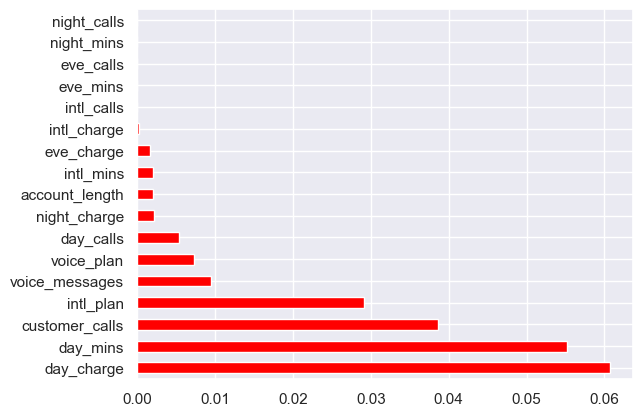

In [121]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
q=q.astype('int')
importances=mutual_info_classif(p,q)
feat_importances=pd.Series(importances,df1.columns[2:19])
feat_importances.nlargest(17).plot(kind='barh',color='red')
plt.show

Extra Trees Classifier

In [122]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

q=q.astype('int')
# feature extraction
model = ExtraTreesClassifier()
model.fit(p, q)

print(model.feature_importances_)

[0.03508761 0.01836165 0.01640584 0.0724922  0.04627339 0.05774908
 0.04696743 0.1331183  0.03420529 0.13500971 0.06437551 0.03379229
 0.06122273 0.04201372 0.03342048 0.04172933 0.12777545]


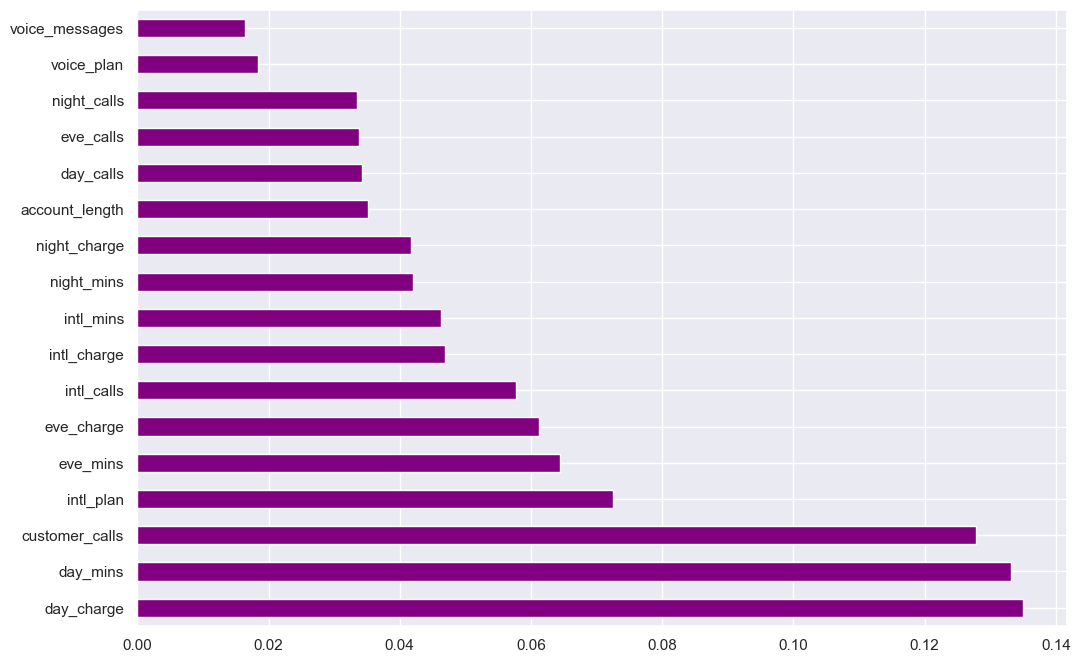

In [123]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(model.feature_importances_, index=df3.columns[2:19])
feat_importances.nlargest(17).plot(kind="barh",color='purple')
plt.show()

Chi-Square Test

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
p_cat=p.astype(int)
chi2_features=SelectKBest(chi2,k=4)
p_kbest_features=chi2_features.fit_transform(p_cat,q)
print('Number of original features:',p_cat.shape[1])
print('Number of reduced features:',p_kbest_features.shape[1])

Number of original features: 17
Number of reduced features: 4


In [125]:
p_kbest_features

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0]])

# Adding new feature.

In [126]:
df2=df1.copy()

In [127]:
df2

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  day_calls  \
1             0       10.0           3         2.70     265.1        110   
2             0       13.7           3         3.70     161.6        123   
3             0       12.2           5         3.29     243.4        114   
4             1        6.6           7         1.78     299.4         71   
5             1       10.1           3         2.73     166.7        113   
...         ...        ...         ...          ...       ...        ...   
4996          0        9.9           5         2.67     235.7        127   
4997          0       14.7           2         3.97     184.2         90   
4998          0       13.6           4         3.67     140.6         89   
4999          0        8.5           6         2.30     188.8         67   
5000          0        9.3          16         2.51     129.4        102   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  
1            11.01               1      0  
2            11.45               1      0  
3             7.32               0      0  
4             8.86               2      0  
5             8.41               3      0  
...            ...             ...    ...  
4996         13.39               2      0  
4997          9.61               3      1  
4998          9.56               1      0  
4999         10.10               0      0  
5000          6.97               0      0  

[5000 rows x 20 columns]

In [128]:
df2['total_charge']=df2['intl_charge']+df2['day_charge']+df2['eve_charge']+df2['night_charge']
df2

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
2       OH  area_code_415             107           1              26   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
5       OK  area_code_415              75           0               0   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
1             0       10.0           3         2.70     265.1  ...   
2             0       13.7           3         3.70     161.6  ...   
3             0       12.2           5         3.29     243.4  ...   
4             1        6.6           7         1.78     299.4  ...   
5             1       10.1           3         2.73     166.7  ...   
...         ...        ...         ...          ...       ...  ...   
4996          0        9.9           5         2.67     235.7  ...   
4997          0       14.7           2         3.97     184.2  ...   
4998          0       13.6           4         3.67     140.6  ...   
4999          0        8.5           6         2.30     188.8  ...   
5000          0        9.3          16         2.51     129.4  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
2          27.47     195.5        103       16.62       254.4          103   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
5          28.34     148.3        122       12.61       186.9          121   
...          ...       ...        ...         ...         ...          ...   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  total_charge  
1            11.01               1      0         75.56  
2            11.45               1      0         59.24  
3             7.32               0      0         62.29  
4             8.86               2      0         66.80  
5             8.41               3      0         52.09  
...            ...             ...    ...           ...  
4996         13.39               2      0         75.09  
4997          9.61               3      1         66.72  
4998          9.56               1      0         51.82  
4999         10.10               0      0         59.09  
5000          6.97               0      0         54.18  

[5000 rows x 21 columns]

In [129]:
df2.describe()

account_length   voice_plan  voice_messages    intl_plan    intl_mins  \
count      5000.00000  5000.000000     5000.000000  5000.000000  5000.000000   
mean        100.25860     0.264600        7.755200     0.094600    10.261780   
std          39.69456     0.441164       13.546393     0.292691     2.761396   
min           1.00000     0.000000        0.000000     0.000000     0.000000   
25%          73.00000     0.000000        0.000000     0.000000     8.500000   
50%         100.00000     0.000000        0.000000     0.000000    10.300000   
75%         127.00000     1.000000       17.000000     0.000000    12.000000   
max         243.00000     1.000000       52.000000     1.000000    20.000000   

        intl_calls  intl_charge     day_mins    day_calls   day_charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      4.435200     2.771196   180.288900   100.029400    30.653426   
std       2.456788     0.745514    53.894699    19.831197     9.159936   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.300000   143.700000    87.000000    24.430000   
50%       4.000000     2.780000   180.100000   100.000000    30.600000   
75%       6.000000     3.240000   216.200000   113.000000    36.750000   
max      20.000000     5.400000   351.500000   165.000000    59.760000   

          eve_mins    eve_calls   eve_charge   night_mins  night_calls  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    200.579940   100.191000    17.054322   200.391620    99.919200   
std      50.433136    19.826496     4.296843    50.527789    19.958686   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     166.600000    87.000000    14.140000   166.900000    87.000000   
50%     200.800000   100.000000    17.090000   200.400000   100.000000   
75%     233.900000   114.000000    19.900000   234.700000   113.000000   
max     363.700000   170.000000    30.910000   395.000000   175.000000   

       night_charge  customer_calls        Churn  total_charge  
count   5000.000000     5000.000000  5000.000000   5000.000000  
mean       9.017732        1.570400     0.141400     59.496676  
std        2.273763        1.306363     0.348469     10.346912  
min        0.000000        0.000000     0.000000     22.930000  
25%        7.510000        1.000000     0.000000     52.480000  
50%        9.020000        1.000000     0.000000     59.510000  
75%       10.560000        2.000000     0.000000     66.392500  
max       17.770000        9.000000     1.000000     96.150000

Visualizing the new feature

In [130]:
churn_df2   = df2[df2["Churn"] == bool(True)]
not_churn_df2= df2[df2["Churn"] == bool(False)]

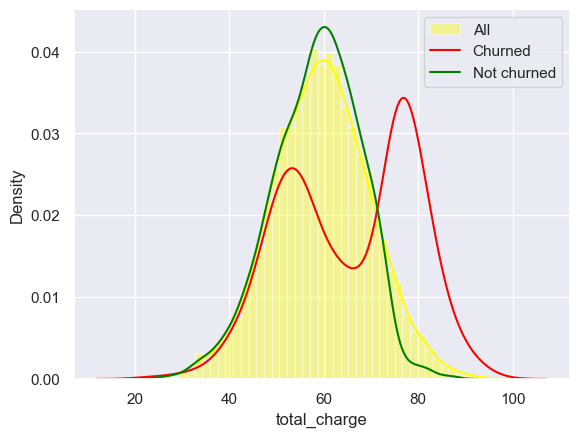

In [131]:
sns.distplot(df2['total_charge'],color = 'yellow',label="All")
sns.distplot(churn_df2['total_charge'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df2['total_charge'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [132]:
df2_40=df2[df2.total_charge <= 40]
df2_40

State      area_code  account_length  voice_plan  voice_messages  \
22      CO  area_code_408              77           0               0   
44      ID  area_code_415             160           0               0   
78      NY  area_code_408             144           0               0   
115     AZ  area_code_415              63           0               0   
127     MS  area_code_415             162           0               0   
...    ...            ...             ...         ...             ...   
4874    IL  area_code_415             118           0               0   
4963    WY  area_code_415              91           0               0   
4970    FL  area_code_408             131           0               0   
4975    LA  area_code_408              96           0               0   
4982    NC  area_code_510              61           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
22            0        5.7           6         1.54      62.4  ...   
44            0        9.2           4         2.48      85.8  ...   
78            0        8.2           7         2.21      61.6  ...   
115           0        9.4           3         2.54      58.9  ...   
127           0        9.1           3         2.46      70.7  ...   
...         ...        ...         ...          ...       ...  ...   
4874          0        6.6           6         1.78     103.6  ...   
4963          0        7.9           7         2.13      34.5  ...   
4970          0       10.6           4         2.86      43.3  ...   
4975          0       14.0           2         3.78     102.1  ...   
4982          0       12.0           4         3.24       7.2  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
22         10.61     169.9        121       14.44       209.6           64   
44         14.59     165.3        110       14.05       178.5           92   
78         10.47      77.1         85        6.55       173.0           99   
115        10.01     169.6         59       14.42       211.4           88   
127        12.02     157.5         87       13.39       154.8           82   
...          ...       ...        ...         ...         ...          ...   
4874       17.61      82.0        149        6.97       169.5          103   
4963        5.87     192.3         80       16.35       256.3           71   
4970        7.36     178.5        113       15.17       185.9          120   
4975       17.36      93.7         88        7.96       236.2          125   
4982        1.22     221.8         78       18.85       174.5           94   

      night_charge  customer_calls  Churn  total_charge  
22            9.43               5      1         36.02  
44            8.03               3      0         39.15  
78            7.79               4      1         27.02  
115           9.51               1      0         36.48  
127           6.97               4      1         34.84  
...            ...             ...    ...           ...  
4874          7.63               0      0         33.99  
4963         11.53               0      0         35.88  
4970          8.37               0      0         33.76  
4975         10.63               1      0         39.73  
4982          7.85               1      0         31.16  

[157 rows x 21 columns]

In [133]:
# Class proportion
class_counts_40 = df2_40.groupby('Churn').size()
print(class_counts_40)

Churn
0    140
1     17
dtype: int64


In [134]:
df2_40.shape

(157, 21)

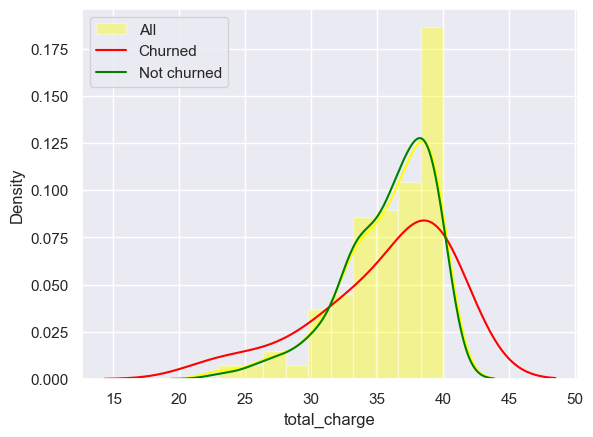

In [135]:
churn_df2_40   = df2_40[df2_40["Churn"] == bool(True)]
not_churn_df2_40= df2_40[df2_40["Churn"] == bool(False)]

sns.distplot(df2_40['total_charge'],color = 'yellow',label="All")
sns.distplot(churn_df2_40['total_charge'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df2_40['total_charge'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [136]:
# total_charge from 41 to 60
df2_60=df2[(df2['total_charge'] <= 60) & (df2['total_charge'] > 40)]
df2_60

State      area_code  account_length  voice_plan  voice_messages  \
2       OH  area_code_415             107           1              26   
5       OK  area_code_415              75           0               0   
8       MO  area_code_415             147           0               0   
11      IN  area_code_415              65           0               0   
12      RI  area_code_415              74           0               0   
...    ...            ...             ...         ...             ...   
4994    WV  area_code_408              73           0               0   
4995    NC  area_code_408              75           0               0   
4998    DC  area_code_415              61           0               0   
4999    DC  area_code_510             109           0               0   
5000    VT  area_code_415              86           1              34   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
2             0       13.7           3         3.70     161.6  ...   
5             1       10.1           3         2.73     166.7  ...   
8             1        7.1           6         1.92     157.0  ...   
11            0       12.7           6         3.43     129.1  ...   
12            0        9.1           5         2.46     187.7  ...   
...         ...        ...         ...          ...       ...  ...   
4994          0       11.5           6         3.11     177.9  ...   
4995          0        6.9           7         1.86     170.7  ...   
4998          0       13.6           4         3.67     140.6  ...   
4999          0        8.5           6         2.30     188.8  ...   
5000          0        9.3          16         2.51     129.4  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
2          27.47     195.5        103       16.62       254.4          103   
5          28.34     148.3        122       12.61       186.9          121   
8          26.69     103.1         94        8.76       211.8           96   
11         21.95     228.5         83       19.42       208.8          111   
12         31.91     163.4        148       13.89       196.0           94   
...          ...       ...        ...         ...         ...          ...   
4994       30.24     131.2         82       11.15       186.2           89   
4995       29.02     193.1        126       16.41       129.1          104   
4998       23.90     172.8        128       14.69       212.4           97   
4999       32.10     171.7         92       14.59       224.4           89   
5000       22.00     267.1        104       22.70       154.8          100   

      night_charge  customer_calls  Churn  total_charge  
2            11.45               1      0         59.24  
5             8.41               3      0         52.09  
8             9.53               0      0         46.90  
11            9.40               4      1         54.20  
12            8.82               0      0         57.08  
...            ...             ...    ...           ...  
4994          8.38               3      0         52.88  
4995          5.81               1      0         53.10  
4998          9.56               1      0         51.82  
4999         10.10               0      0         59.09  
5000          6.97               0      0         54.18  

[2432 rows x 21 columns]

In [137]:
# Class proportion
class_counts_60 = df2_60.groupby('Churn').size()
print(class_counts_60)

Churn
0    2163
1     269
dtype: int64


In [138]:
df2_60.shape

(2432, 21)

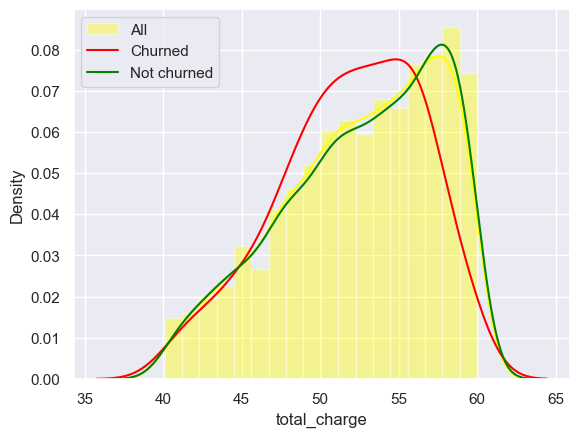

In [139]:
churn_df2_60  = df2_60[df2_60["Churn"] == bool(True)]
not_churn_df2_60= df2_60[df2_60["Churn"] == bool(False)]

sns.distplot(df2_60['total_charge'],color = 'yellow',label="All")
sns.distplot(churn_df2_60['total_charge'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df2_60['total_charge'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [140]:
df2_80=df2[(df2['total_charge'] <= 80) & (df2['total_charge'] > 60)]
df2_80

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415             128           1              25   
3       NJ  area_code_415             137           0               0   
4       OH  area_code_408              84           0               0   
6       AL  area_code_510             118           0               0   
7       MA  area_code_510             121           1              24   
...    ...            ...             ...         ...             ...   
4987    OH  area_code_415             125           0               0   
4991    ND  area_code_510             140           0               0   
4993    MT  area_code_415              83           0               0   
4996    HI  area_code_408              50           1              40   
4997    WV  area_code_415             152           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
1             0       10.0           3         2.70     265.1  ...   
3             0       12.2           5         3.29     243.4  ...   
4             1        6.6           7         1.78     299.4  ...   
6             1        6.3           6         1.70     223.4  ...   
7             0        7.5           7         2.03     218.2  ...   
...         ...        ...         ...          ...       ...  ...   
4987          0        7.4           6         2.00     214.7  ...   
4991          0        7.5           6         2.03     244.7  ...   
4993          0       10.3           6         2.78     188.3  ...   
4996          0        9.9           5         2.67     235.7  ...   
4997          0       14.7           2         3.97     184.2  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1          45.07     197.4         99       16.78       244.7           91   
3          41.38     121.2        110       10.30       162.6          104   
4          50.90      61.9         88        5.26       196.9           89   
6          37.98     220.6        101       18.75       203.9          118   
7          37.09     348.5        108       29.62       212.6          118   
...          ...       ...        ...         ...         ...          ...   
4987       36.50     260.6         94       22.15       266.3          123   
4991       41.60     258.6        101       21.98       231.3          112   
4993       30.60     243.8         88       20.72       213.7           79   
4996       40.07     223.0        126       18.96       297.5          116   
4997       31.31     256.8         73       21.83       213.6          113   

      night_charge  customer_calls  Churn  total_charge  
1            11.01               1      0         75.56  
3             7.32               0      0         62.29  
4             8.86               2      0         66.80  
6             9.18               0      0         67.61  
7             9.57               3      0         78.31  
...            ...             ...    ...           ...  
4987         11.98               3      0         72.63  
4991         10.41               1      1         76.02  
4993          9.62               0      0         63.72  
4996         13.39               2      0         75.09  
4997          9.61               3      1         66.72  

[2283 rows x 21 columns]

In [141]:
# Class proportion
class_counts_80 = df2_80.groupby('Churn').size()
print(class_counts_80)

Churn
0    1960
1     323
dtype: int64


In [142]:
df2_80.shape

(2283, 21)

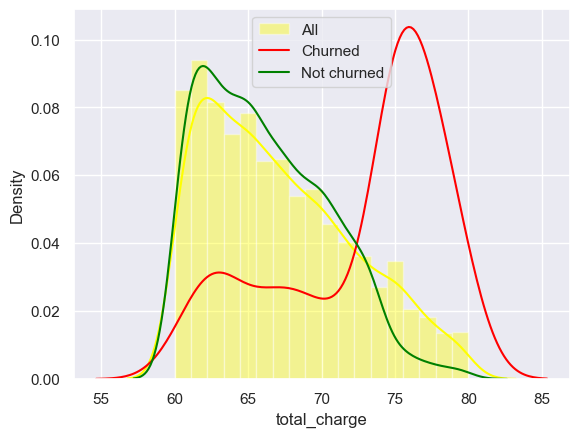

In [143]:
churn_df2_80   = df2_80[df2_80["Churn"] == bool(True)]
not_churn_df2_80= df2_80[df2_80["Churn"] == bool(False)]

sns.distplot(df2_80['total_charge'],color = 'yellow',label="All")
sns.distplot(churn_df2_80['total_charge'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df2_80['total_charge'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [144]:
df2_100=df2[(df2['total_charge'] <= 100) & (df2['total_charge'] > 80)]
df2_100

State      area_code  account_length  voice_plan  voice_messages  \
10      WV  area_code_415             141           1              37   
16      NY  area_code_415             161           0               0   
77      DC  area_code_415              82           0               0   
157     OH  area_code_415              83           0               0   
198     TX  area_code_510             208           0               0   
...    ...            ...             ...         ...             ...   
4919    MA  area_code_408             110           0               0   
4925    OK  area_code_510             110           0               0   
4944    OR  area_code_510             132           0               0   
4960    NM  area_code_408             137           0               0   
4992    AZ  area_code_510              97           0               0   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
10            1       11.2           5         3.02     258.6  ...   
16            0        5.4           9         1.46     332.9  ...   
77            0       11.7           4         3.16     300.3  ...   
157           0       15.8           7         4.27     337.4  ...   
198           0       10.7           6         2.89     326.5  ...   
...         ...        ...         ...          ...       ...  ...   
4919          0       10.1           5         2.73     272.5  ...   
4925          0        8.5           4         2.30     281.2  ...   
4944          0       13.6           9         3.67     265.8  ...   
4960          1       10.6           2         2.86     312.4  ...   
4992          0        8.8           5         2.38     252.6  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
10         43.96     222.0        111       18.87       326.4           97   
16         56.59     317.8         97       27.01       160.6          128   
77         51.05     181.0        100       15.39       270.1           73   
157        57.36     227.4        116       19.33       153.9          114   
198        55.51     176.3        113       14.99       181.7          102   
...          ...       ...        ...         ...         ...          ...   
4919       46.33     288.9        113       24.56       172.4           96   
4925       47.80     302.3         89       25.70       188.4           92   
4944       45.19     285.1         90       24.23       183.6          124   
4960       53.11     231.1         73       19.64       120.1           78   
4992       42.94     340.3         91       28.93       256.5           67   

      night_charge  customer_calls  Churn  total_charge  
10           14.69               0      0         80.54  
16            7.23               4      1         92.29  
77           12.15               0      1         81.75  
157           6.93               0      1         87.89  
198           8.18               2      1         81.57  
...            ...             ...    ...           ...  
4919          7.76               2      1         81.38  
4925          8.48               0      1         84.28  
4944          8.26               2      1         81.35  
4960          5.40               1      1         81.01  
4992         11.54               1      1         85.79  

[128 rows x 21 columns]

In [145]:
# Class proportion
class_counts_100 = df2_100.groupby('Churn').size()
print(class_counts_100)

Churn
0    30
1    98
dtype: int64


In [146]:
df2_100.shape

(128, 21)

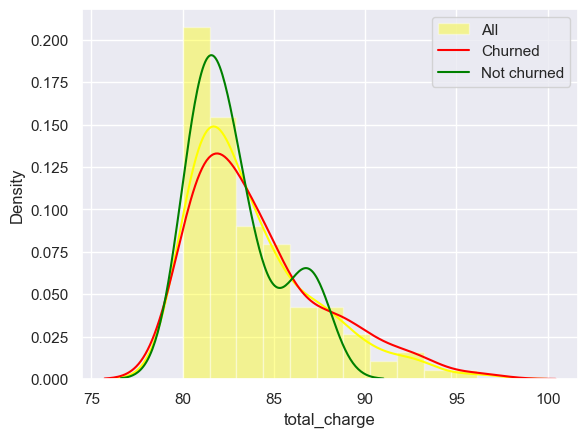

In [147]:
churn_df2_100   = df2_100[df2_100["Churn"] == bool(True)]
not_churn_df2_100= df2_100[df2_100["Churn"] == bool(False)]

sns.distplot(df2_100['total_charge'],color = 'yellow',label="All")
sns.distplot(churn_df2_100['total_charge'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df2_100['total_charge'],color = 'green',hist= False,label="Not churned")
plt.legend()

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   int64  
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   int64  
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   float64
 12  eve_mins        5000 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

In [149]:
df2_new=df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,19]]

In [150]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   int64  
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   int64  
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   float64
 12  eve_mins        5000 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

In [151]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
cols_scal=['account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls','total_charge']
df2_new[cols_scal]=scaler.fit_transform(df2_new[cols_scal])

In [152]:
df2_new

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415        0.524793         1.0        0.480769   
2       OH  area_code_415        0.438017         1.0        0.500000   
3       NJ  area_code_415        0.561983         0.0        0.000000   
4       OH  area_code_408        0.342975         0.0        0.000000   
5       OK  area_code_415        0.305785         0.0        0.000000   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408        0.202479         1.0        0.769231   
4997    WV  area_code_415        0.623967         0.0        0.000000   
4998    DC  area_code_415        0.247934         0.0        0.000000   
4999    DC  area_code_510        0.446281         0.0        0.000000   
5000    VT  area_code_415        0.351240         1.0        0.653846   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
1           0.0      0.500        0.15     0.500000  0.754196  ...   
2           0.0      0.685        0.15     0.685185  0.459744  ...   
3           0.0      0.610        0.25     0.609259  0.692461  ...   
4           1.0      0.330        0.35     0.329630  0.851778  ...   
5           1.0      0.505        0.15     0.505556  0.474253  ...   
...         ...        ...         ...          ...       ...  ...   
4996        0.0      0.495        0.25     0.494444  0.670555  ...   
4997        0.0      0.735        0.10     0.735185  0.524040  ...   
4998        0.0      0.680        0.20     0.679630  0.400000  ...   
4999        0.0      0.425        0.30     0.425926  0.537127  ...   
5000        0.0      0.465        0.80     0.464815  0.368137  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1       0.754183  0.542755   0.582353    0.542866    0.619494     0.520000   
2       0.459672  0.537531   0.605882    0.537690    0.644051     0.588571   
3       0.692436  0.333242   0.647059    0.333225    0.411646     0.594286   
4       0.851740  0.170195   0.517647    0.170171    0.498481     0.508571   
5       0.474230  0.407754   0.717647    0.407959    0.473165     0.691429   
...          ...       ...        ...         ...         ...          ...   
4996    0.670515  0.613143   0.741176    0.613394    0.753165     0.662857   
4997    0.523929  0.706076   0.429412    0.706244    0.540759     0.645714   
4998    0.399933  0.475117   0.752941    0.475251    0.537722     0.554286   
4999    0.537149  0.472092   0.541176    0.472016    0.568101     0.508571   
5000    0.368139  0.734396   0.611765    0.734390    0.391899     0.571429   

      night_charge  customer_calls  total_charge  Churn  
1         0.619584        0.111111      0.718793      0  
2         0.644344        0.111111      0.495903      0  
3         0.411930        0.000000      0.537558      0  
4         0.498593        0.222222      0.599153      0  
5         0.473270        0.333333      0.398252      0  
...            ...             ...           ...    ...  
4996      0.753517        0.222222      0.712374      0  
4997      0.540799        0.333333      0.598061      1  
4998      0.537985        0.111111      0.394564      0  
4999      0.568374        0.000000      0.493854      0  
5000      0.392234        0.000000      0.426796      0  

[5000 rows x 21 columns]

In [153]:
y1=df2_new['Churn']
x1=df2_new.drop(['State','area_code','Churn'],axis=1)

In [154]:
y1

1       0
2       0
3       0
4       0
5       0
       ..
4996    0
4997    1
4998    0
4999    0
5000    0
Name: Churn, Length: 5000, dtype: int64

In [155]:
x1

account_length  voice_plan  voice_messages  intl_plan  intl_mins  \
1           0.524793         1.0        0.480769        0.0      0.500   
2           0.438017         1.0        0.500000        0.0      0.685   
3           0.561983         0.0        0.000000        0.0      0.610   
4           0.342975         0.0        0.000000        1.0      0.330   
5           0.305785         0.0        0.000000        1.0      0.505   
...              ...         ...             ...        ...        ...   
4996        0.202479         1.0        0.769231        0.0      0.495   
4997        0.623967         0.0        0.000000        0.0      0.735   
4998        0.247934         0.0        0.000000        0.0      0.680   
4999        0.446281         0.0        0.000000        0.0      0.425   
5000        0.351240         1.0        0.653846        0.0      0.465   

      intl_calls  intl_charge  day_mins  day_calls  day_charge  eve_mins  \
1           0.15     0.500000  0.754196   0.666667    0.754183  0.542755   
2           0.15     0.685185  0.459744   0.745455    0.459672  0.537531   
3           0.25     0.609259  0.692461   0.690909    0.692436  0.333242   
4           0.35     0.329630  0.851778   0.430303    0.851740  0.170195   
5           0.15     0.505556  0.474253   0.684848    0.474230  0.407754   
...          ...          ...       ...        ...         ...       ...   
4996        0.25     0.494444  0.670555   0.769697    0.670515  0.613143   
4997        0.10     0.735185  0.524040   0.545455    0.523929  0.706076   
4998        0.20     0.679630  0.400000   0.539394    0.399933  0.475117   
4999        0.30     0.425926  0.537127   0.406061    0.537149  0.472092   
5000        0.80     0.464815  0.368137   0.618182    0.368139  0.734396   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  \
1      0.582353    0.542866    0.619494     0.520000      0.619584   
2      0.605882    0.537690    0.644051     0.588571      0.644344   
3      0.647059    0.333225    0.411646     0.594286      0.411930   
4      0.517647    0.170171    0.498481     0.508571      0.498593   
5      0.717647    0.407959    0.473165     0.691429      0.473270   
...         ...         ...         ...          ...           ...   
4996   0.741176    0.613394    0.753165     0.662857      0.753517   
4997   0.429412    0.706244    0.540759     0.645714      0.540799   
4998   0.752941    0.475251    0.537722     0.554286      0.537985   
4999   0.541176    0.472016    0.568101     0.508571      0.568374   
5000   0.611765    0.734390    0.391899     0.571429      0.392234   

      customer_calls  total_charge  
1           0.111111      0.718793  
2           0.111111      0.495903  
3           0.000000      0.537558  
4           0.222222      0.599153  
5           0.333333      0.398252  
...              ...           ...  
4996        0.222222      0.712374  
4997        0.333333      0.598061  
4998        0.111111      0.394564  
4999        0.000000      0.493854  
5000        0.000000      0.426796  

[5000 rows x 18 columns]

In [156]:
x1.shape

(5000, 18)

In [157]:
y1.shape

(5000,)

Mutual_info_classif

<function matplotlib.pyplot.show(close=None, block=None)>

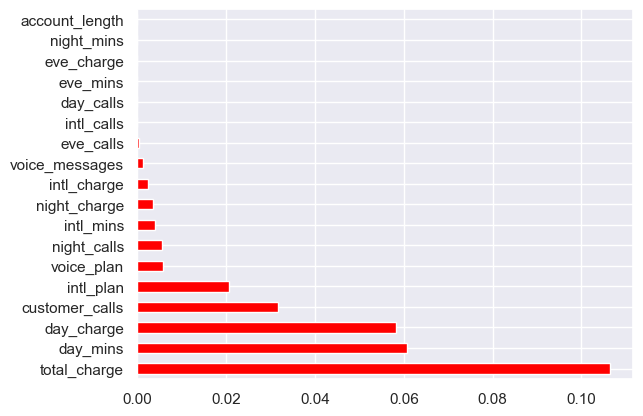

In [158]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
y1=y1.astype('int')
importances=mutual_info_classif(x1,y1)
feat_importances=pd.Series(importances,df2_new.columns[2:20])
feat_importances.nlargest(18).plot(kind='barh',color='red')
plt.show

In [159]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

y1=y1.astype('int')
# feature extraction
model = ExtraTreesClassifier()
model.fit(x1, y1)

print(model.feature_importances_)

[0.0288307  0.02677755 0.01868362 0.07464448 0.04074725 0.05175934
 0.04056145 0.1004067  0.02941832 0.09656873 0.04310544 0.02814562
 0.04513036 0.03251093 0.02973606 0.03142258 0.12974887 0.151802  ]


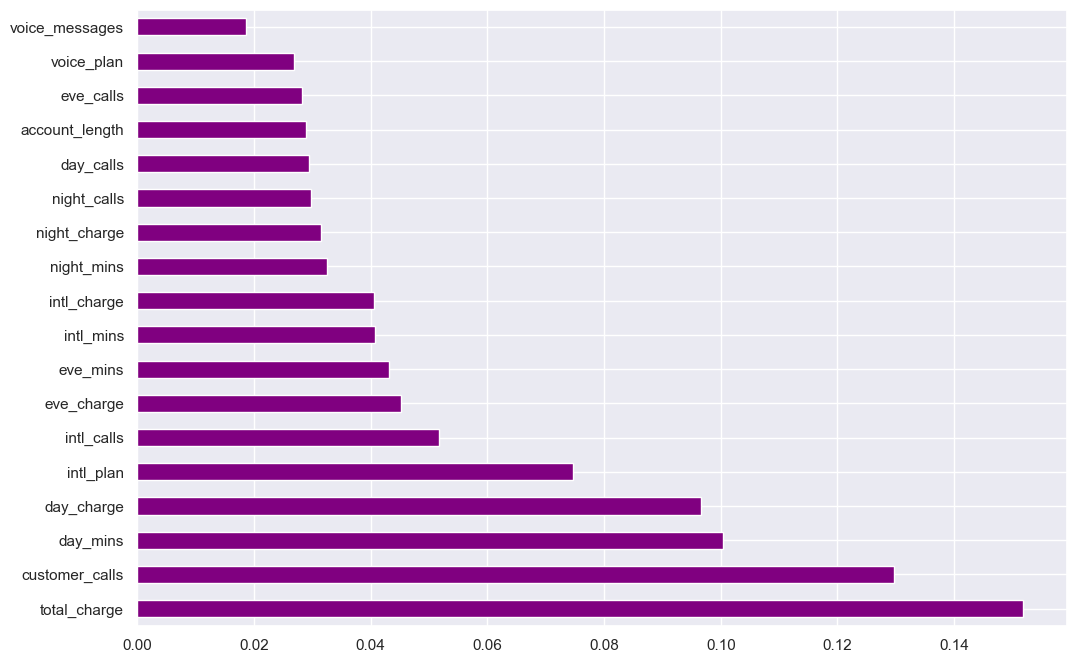

In [160]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(model.feature_importances_, index=df2_new.columns[2:20])
feat_importances.nlargest(18).plot(kind="barh",color='purple')
plt.show()

In [161]:
from pandas import read_csv
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.linear_model import LogisticRegression

array=df2_new.values
v=array[:,2:20]
w=array[:,20]
w=w.astype('int')
# feature extraction
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(v, w)

print(fit.n_features_,
fit.support_,
fit.ranking_)

4 [False False False  True False  True False False False False False False
 False False False False  True  True] [13  6  8  1 10  1  2  3 12  4  9 15  5  7 14 11  1  1]


In [162]:
df2_new.columns

Index(['State', 'area_code', 'account_length', 'voice_plan', 'voice_messages',
       'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge', 'day_mins',
       'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge',
       'night_mins', 'night_calls', 'night_charge', 'customer_calls',
       'total_charge', 'Churn'],
      dtype='object')

From mutual_info_classif,Extra trees classifier and Recursive feature elimination technique ,we observe that 'intl_plan', 'voice_plan', 'customer_calls' and 'total_charge' are the most important features.Hence we will select these four features for model building. 

# Model Building and Validation

All features

In [163]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
  
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

LOGISTIC REGRESSION

In [164]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [165]:
x1.shape

(5000, 18)

In [166]:
y1.shape

(5000,)

In [167]:
model=LogisticRegression()
model.fit(x1_train,y1_train)

LogisticRegression()

In [168]:
#Predict for X dataset
y1_pred = model.predict(x1_test)

In [169]:
y_pred_df1= pd.DataFrame({'actual': y1_test,
                         'predicted_prob': model.predict(x1_test)})

In [170]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test,y1_pred)
print (confusion_matrix)

[[1272   26]
 [ 165   37]]


In [171]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1298
           1       0.59      0.18      0.28       202

    accuracy                           0.87      1500
   macro avg       0.74      0.58      0.60      1500
weighted avg       0.85      0.87      0.84      1500



Text(0, 0.5, 'True Positive Rate')

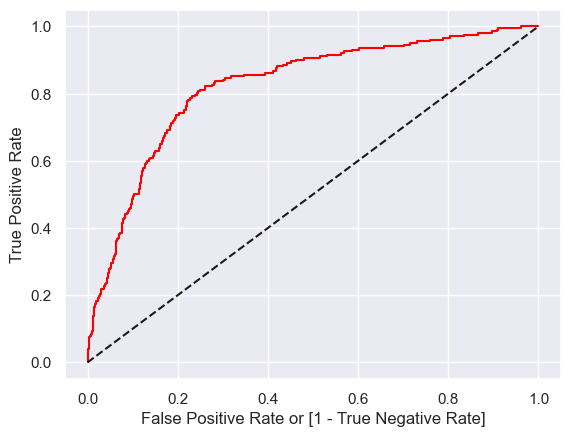

In [172]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y1_test, model.predict_proba (x1_test)[:,1])

auc = roc_auc_score(y1_test, y1_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [173]:
auc

0.5815687500953485

CART Classification

In [174]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10)

model_dt = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model_dt, x1, y1, cv=kfold)
print(results.mean())

model_dt = DecisionTreeClassifier()
dt=model_dt.fit(x1_train,y1_train)

y1_pred_dt=model_dt.predict(x1_test)
print(classification_report(y1_test,y1_pred_dt))

0.9518000000000001
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1298
           1       0.80      0.87      0.84       202

    accuracy                           0.95      1500
   macro avg       0.89      0.92      0.90      1500
weighted avg       0.96      0.95      0.95      1500



Gaussian Naive Bayes Classification

In [175]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model_g = GaussianNB()
model_g.fit(x1_train,y1_train)
results = cross_val_score(model_g, x1, y1, cv=kfold)
print(results.mean())

y1_pred_g=model_g.predict(x1_test)
print(classification_report(y1_test,y1_pred_g))

0.8802
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1298
           1       0.55      0.67      0.61       202

    accuracy                           0.88      1500
   macro avg       0.75      0.79      0.77      1500
weighted avg       0.89      0.88      0.89      1500



KNN Classification

In [176]:
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model_knn = KNeighborsClassifier(n_neighbors=17)
model_knn.fit(x1_train,y1_train)
results = cross_val_score(model_knn, x1, y1, cv=kfold)

print(results.mean())

y1_pred_knn=model_knn.predict(x1_test)
print(classification_report(y1_test,y1_pred_knn))


0.9048
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1298
           1       0.89      0.32      0.47       202

    accuracy                           0.90      1500
   macro avg       0.90      0.66      0.71      1500
weighted avg       0.90      0.90      0.88      1500



SVC

In [177]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc1 = SVC(kernel='rbf')
model_svc1.fit(x1_train,y1_train)
results = cross_val_score(model_svc1, x1, y1, cv=kfold)
print(results.mean())

y1_pred_svc1=model_svc1.predict(x1_test)
print(classification_report(y1_test,y1_pred_svc1))

0.9192
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1298
           1       0.88      0.47      0.61       202

    accuracy                           0.92      1500
   macro avg       0.90      0.73      0.78      1500
weighted avg       0.92      0.92      0.91      1500



In [178]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc2 = SVC(kernel='poly')
model_svc2.fit(x1_train,y1_train)
results = cross_val_score(model_svc2, x1, y1, cv=kfold)
print(results.mean())

y1_pred_svc2=model_svc2.predict(x1_test)
print(classification_report(y1_test,y1_pred_svc2))

0.9194000000000001
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1298
           1       0.79      0.50      0.61       202

    accuracy                           0.91      1500
   macro avg       0.86      0.74      0.78      1500
weighted avg       0.91      0.91      0.91      1500



In [179]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc3 = SVC(kernel='linear')
model_svc3.fit(x1_train,y1_train)
results = cross_val_score(model_svc3, x1, y1, cv=kfold)
print(results.mean())

y1_pred_svc3=model_svc3.predict(x1_test)
print(classification_report(y1_test,y1_pred_svc3))

0.8586
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1298
           1       0.00      0.00      0.00       202

    accuracy                           0.87      1500
   macro avg       0.43      0.50      0.46      1500
weighted avg       0.75      0.87      0.80      1500



In [180]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc4 = SVC(kernel='sigmoid')
model_svc4.fit(x1_train,y1_train)
results = cross_val_score(model_svc4, x1, y1, cv=kfold)
print(results.mean())

y1_pred_svc4=model_svc4.predict(x1_test)
print(classification_report(y1_test,y1_pred_svc4))

0.8448
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1298
           1       0.12      0.06      0.08       202

    accuracy                           0.81      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.76      0.81      0.79      1500



AdaBoost Classification

In [181]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model_ab = AdaBoostClassifier(n_estimators=num_trees)
model_ab.fit(x1_train,y1_train)
results = cross_val_score(model_ab, x1, y1, cv=kfold)
print(results.mean())

y1_pred_ab=model_ab.predict(x1_test)
print(classification_report(y1_test,y1_pred_ab))

0.9258000000000001
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1298
           1       0.85      0.59      0.70       202

    accuracy                           0.93      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.93      0.93      0.93      1500



Random Forest Classification

In [182]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 4
kfold = KFold(n_splits=10)
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf.fit(x1_train,y1_train)
results = cross_val_score(model_rf, x1, y1, cv=kfold)
print(results.mean())

y1_pred_rf=model_rf.predict(x1_test)
print(classification_report(y1_test,y1_pred_rf))

0.9782
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1298
           1       1.00      0.87      0.93       202

    accuracy                           0.98      1500
   macro avg       0.99      0.93      0.96      1500
weighted avg       0.98      0.98      0.98      1500



# Compare Algorithms

In [183]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=17)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
models.append(('RFC',RandomForestClassifier(n_estimators=100, max_features=4)))
models.append(('Adaboost',AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x1, y1, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.865600 (0.016366)
KNN: 0.904800 (0.010048)
CART: 0.953200 (0.010008)
NB: 0.880200 (0.010332)
SVM: 0.919200 (0.010703)
RFC: 0.978600 (0.007324)
Adaboost: 0.919600 (0.012060)


# Boxplot algorithm comparison

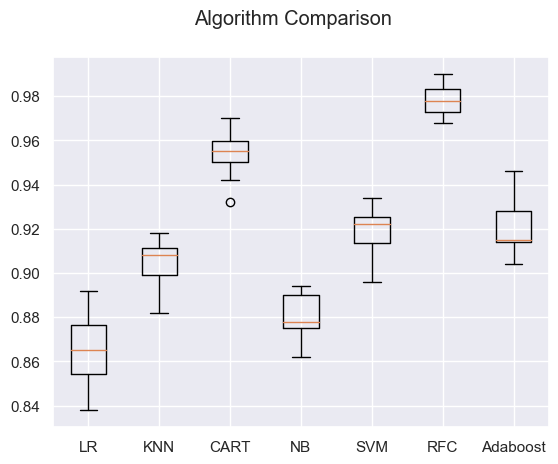

In [184]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Model Building with 4 features

In [185]:
x2 = df1[['customer_calls','intl_plan', 'day_mins', 'voice_plan']]

In [186]:
y2 = df1['Churn']

In [187]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 0)

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x2_train_sc = scaler.fit_transform(x2_train)
x2_test_sc = scaler.transform(x2_test)

Logistic Regression

In [189]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)
classifier_regressor.fit(x2_train_sc,y2_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [190]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [191]:
print(classifier_regressor.best_score_)

0.858


In [192]:
##prediction
y_predlr=classifier_regressor.predict(x2_test_sc)

In [193]:
## accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [194]:
score=accuracy_score(y_predlr,y2_test)
print(score)

0.8666666666666667


In [195]:
print(classification_report(y_predlr,y2_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1440
           1       0.15      0.52      0.24        60

    accuracy                           0.87      1500
   macro avg       0.57      0.70      0.58      1500
weighted avg       0.94      0.87      0.90      1500



CART

In [196]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10)

model_dt = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model_dt, x2, y2, cv=kfold)
print(results.mean())

model_dt = DecisionTreeClassifier()
dt=model_dt.fit(x2_train_sc,y2_train)

y2_pred_dt=model_dt.predict(x2_test_sc)
print(classification_report(y2_test,y2_pred_dt))

0.8572000000000001
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1298
           1       0.49      0.56      0.53       202

    accuracy                           0.86      1500
   macro avg       0.71      0.74      0.72      1500
weighted avg       0.87      0.86      0.87      1500



Gaussian Naive Baye's

In [197]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model_g = GaussianNB()
model_g.fit(x2_train_sc,y2_train)
results = cross_val_score(model_g, x2, y2, cv=kfold)
print(results.mean())

y2_pred_g=model_g.predict(x2_test_sc)
print(classification_report(y2_test,y2_pred_g))

0.8533999999999999
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1298
           1       0.46      0.44      0.45       202

    accuracy                           0.85      1500
   macro avg       0.68      0.68      0.68      1500
weighted avg       0.85      0.85      0.85      1500



KNN

In [198]:
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model_knn = KNeighborsClassifier(n_neighbors=17)
model_knn.fit(x2_train_sc,y2_train)
results = cross_val_score(model_knn, x2, y2, cv=kfold)

print(results.mean())

y2_pred_knn=model_knn.predict(x2_test_sc)
print(classification_report(y2_test,y2_pred_knn))


0.8783999999999998
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1298
           1       0.67      0.43      0.52       202

    accuracy                           0.89      1500
   macro avg       0.79      0.70      0.73      1500
weighted avg       0.88      0.89      0.88      1500



Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 4
kfold = KFold(n_splits=10)
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf.fit(x2_train_sc,y2_train)
results = cross_val_score(model_rf, x2, y2, cv=kfold)
print(results.mean())

y2_pred_rf=model_rf.predict(x2_test_sc)
print(classification_report(y2_test,y2_pred_rf))

0.8708
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1298
           1       0.52      0.52      0.52       202

    accuracy                           0.87      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



SVM

In [200]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc1 = SVC(kernel='rbf')
model_svc1.fit(x2_train_sc,y2_train)
results = cross_val_score(model_svc1, x2, y2, cv=kfold)
print(results.mean())

y2_pred_svc1=model_svc1.predict(x2_test_sc)
print(classification_report(y2_test,y2_pred_svc1))

0.8668000000000001
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1298
           1       0.75      0.22      0.34       202

    accuracy                           0.89      1500
   macro avg       0.82      0.61      0.64      1500
weighted avg       0.87      0.89      0.86      1500



AdaBoost Classifier

In [201]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model_ab = AdaBoostClassifier(n_estimators=num_trees)
model_ab.fit(x2_train_sc,y2_train)
results = cross_val_score(model_ab, x2, y2, cv=kfold)
print(results.mean())

y2_pred_ab=model_ab.predict(x2_test_sc)
print(classification_report(y2_test,y2_pred_ab))

0.8802
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1298
           1       0.61      0.27      0.38       202

    accuracy                           0.88      1500
   macro avg       0.75      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



# Model building with final 4 features

In [202]:
df2_new

State      area_code  account_length  voice_plan  voice_messages  \
1       KS  area_code_415        0.524793         1.0        0.480769   
2       OH  area_code_415        0.438017         1.0        0.500000   
3       NJ  area_code_415        0.561983         0.0        0.000000   
4       OH  area_code_408        0.342975         0.0        0.000000   
5       OK  area_code_415        0.305785         0.0        0.000000   
...    ...            ...             ...         ...             ...   
4996    HI  area_code_408        0.202479         1.0        0.769231   
4997    WV  area_code_415        0.623967         0.0        0.000000   
4998    DC  area_code_415        0.247934         0.0        0.000000   
4999    DC  area_code_510        0.446281         0.0        0.000000   
5000    VT  area_code_415        0.351240         1.0        0.653846   

      intl_plan  intl_mins  intl_calls  intl_charge  day_mins  ...  \
1           0.0      0.500        0.15     0.500000  0.754196  ...   
2           0.0      0.685        0.15     0.685185  0.459744  ...   
3           0.0      0.610        0.25     0.609259  0.692461  ...   
4           1.0      0.330        0.35     0.329630  0.851778  ...   
5           1.0      0.505        0.15     0.505556  0.474253  ...   
...         ...        ...         ...          ...       ...  ...   
4996        0.0      0.495        0.25     0.494444  0.670555  ...   
4997        0.0      0.735        0.10     0.735185  0.524040  ...   
4998        0.0      0.680        0.20     0.679630  0.400000  ...   
4999        0.0      0.425        0.30     0.425926  0.537127  ...   
5000        0.0      0.465        0.80     0.464815  0.368137  ...   

      day_charge  eve_mins  eve_calls  eve_charge  night_mins  night_calls  \
1       0.754183  0.542755   0.582353    0.542866    0.619494     0.520000   
2       0.459672  0.537531   0.605882    0.537690    0.644051     0.588571   
3       0.692436  0.333242   0.647059    0.333225    0.411646     0.594286   
4       0.851740  0.170195   0.517647    0.170171    0.498481     0.508571   
5       0.474230  0.407754   0.717647    0.407959    0.473165     0.691429   
...          ...       ...        ...         ...         ...          ...   
4996    0.670515  0.613143   0.741176    0.613394    0.753165     0.662857   
4997    0.523929  0.706076   0.429412    0.706244    0.540759     0.645714   
4998    0.399933  0.475117   0.752941    0.475251    0.537722     0.554286   
4999    0.537149  0.472092   0.541176    0.472016    0.568101     0.508571   
5000    0.368139  0.734396   0.611765    0.734390    0.391899     0.571429   

      night_charge  customer_calls  total_charge  Churn  
1         0.619584        0.111111      0.718793      0  
2         0.644344        0.111111      0.495903      0  
3         0.411930        0.000000      0.537558      0  
4         0.498593        0.222222      0.599153      0  
5         0.473270        0.333333      0.398252      0  
...            ...             ...           ...    ...  
4996      0.753517        0.222222      0.712374      0  
4997      0.540799        0.333333      0.598061      1  
4998      0.537985        0.111111      0.394564      0  
4999      0.568374        0.000000      0.493854      0  
5000      0.392234        0.000000      0.426796      0  

[5000 rows x 21 columns]

In [203]:
final_df=df2_new[['voice_plan','intl_plan','customer_calls','total_charge','Churn']].copy()

In [204]:
final_df

voice_plan  intl_plan  customer_calls  total_charge  Churn
1            1.0        0.0        0.111111      0.718793      0
2            1.0        0.0        0.111111      0.495903      0
3            0.0        0.0        0.000000      0.537558      0
4            0.0        1.0        0.222222      0.599153      0
5            0.0        1.0        0.333333      0.398252      0
...          ...        ...             ...           ...    ...
4996         1.0        0.0        0.222222      0.712374      0
4997         0.0        0.0        0.333333      0.598061      1
4998         0.0        0.0        0.111111      0.394564      0
4999         0.0        0.0        0.000000      0.493854      0
5000         1.0        0.0        0.000000      0.426796      0

[5000 rows x 5 columns]

<AxesSubplot:>

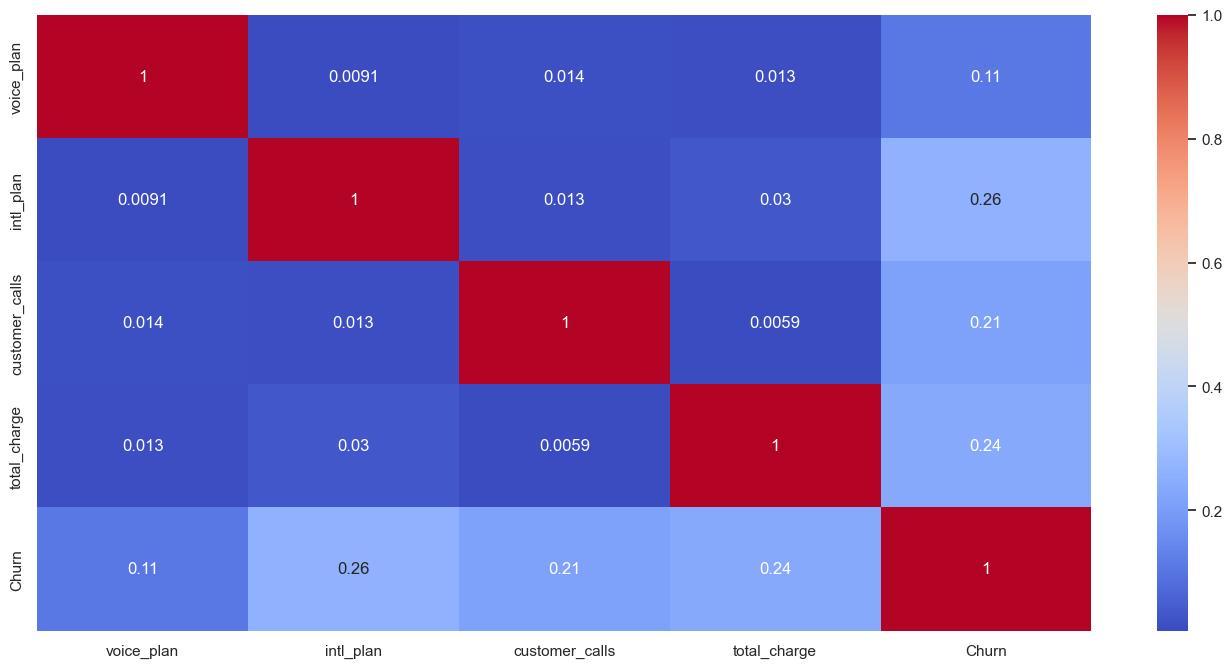

In [205]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [206]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   voice_plan      5000 non-null   float64
 1   intl_plan       5000 non-null   float64
 2   customer_calls  5000 non-null   float64
 3   total_charge    5000 non-null   float64
 4   Churn           5000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 234.4 KB


In [207]:
x=final_df.drop(['Churn'],axis=1)
y=final_df['Churn']

In [208]:
x

voice_plan  intl_plan  customer_calls  total_charge
1            1.0        0.0        0.111111      0.718793
2            1.0        0.0        0.111111      0.495903
3            0.0        0.0        0.000000      0.537558
4            0.0        1.0        0.222222      0.599153
5            0.0        1.0        0.333333      0.398252
...          ...        ...             ...           ...
4996         1.0        0.0        0.222222      0.712374
4997         0.0        0.0        0.333333      0.598061
4998         0.0        0.0        0.111111      0.394564
4999         0.0        0.0        0.000000      0.493854
5000         1.0        0.0        0.000000      0.426796

[5000 rows x 4 columns]

In [209]:
y

1       0
2       0
3       0
4       0
5       0
       ..
4996    0
4997    1
4998    0
4999    0
5000    0
Name: Churn, Length: 5000, dtype: int64

In [210]:
x.shape

(5000, 4)

In [211]:
y.shape

(5000,)

In [212]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [213]:
x_train.shape,y_train.shape

((3500, 4), (3500,))

In [214]:
x_test.shape,y_test.shape

((1500, 4), (1500,))

LOGISTIC REGRESSION

In [215]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)

LogisticRegression()

In [216]:
y_pred1=model_lr.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [217]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
print (confusion_matrix)

[[1274   24]
 [ 168   34]]


In [218]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1298
           1       0.59      0.17      0.26       202

    accuracy                           0.87      1500
   macro avg       0.73      0.57      0.60      1500
weighted avg       0.84      0.87      0.84      1500



CART

In [219]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10)

model_dt = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model_dt, x_train, y_train, cv=kfold)
print(results.mean())

model_dt = DecisionTreeClassifier()
dt=model_dt.fit(x_train,y_train)

0.9231428571428572


In [220]:
y_pred_cart=model_dt.predict(x_test)
print(classification_report(y_test,y_pred_cart))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1298
           1       0.71      0.72      0.71       202

    accuracy                           0.92      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.92      0.92      0.92      1500



Gaussian Naive Baye's

In [221]:
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model_g = GaussianNB()
model_g.fit(x_train,y_train)
results = cross_val_score(model_g, x_train, y_train, cv=kfold)
print(results.mean())

0.8554285714285715


In [222]:
y_pred_nb=model_g.predict(x_test)
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1298
           1       0.46      0.45      0.45       202

    accuracy                           0.86      1500
   macro avg       0.69      0.68      0.69      1500
weighted avg       0.85      0.86      0.85      1500



KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model_knn = KNeighborsClassifier(n_neighbors=17)
model_knn.fit(x_train,y_train)

results = cross_val_score(model_knn, x_train, y_train, cv=kfold)

print(results.mean())


0.9382857142857143


In [224]:
y_pred_knn=model_knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1298
           1       0.89      0.56      0.69       202

    accuracy                           0.93      1500
   macro avg       0.91      0.77      0.82      1500
weighted avg       0.93      0.93      0.92      1500



SVC

In [225]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc = SVC(kernel='rbf')
results = cross_val_score(model_svc, x_train, y_train, cv=kfold)
print(results.mean())


0.9119999999999999


In [226]:
model_svc.fit(x_train,y_train)
y_pred=model_svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1298
           1       0.92      0.40      0.55       202

    accuracy                           0.91      1500
   macro avg       0.92      0.70      0.75      1500
weighted avg       0.91      0.91      0.90      1500



AdaBoost Classifier

In [227]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model_ab = AdaBoostClassifier(n_estimators=num_trees)
model_ab.fit(x_train,y_train)
results = cross_val_score(model_ab, x_train, y_train, cv=kfold)
print(results.mean())

0.9088571428571429


In [228]:
y_pred=model_ab.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1298
           1       0.76      0.47      0.58       202

    accuracy                           0.91      1500
   macro avg       0.84      0.72      0.76      1500
weighted avg       0.90      0.91      0.90      1500



Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 4
kfold = KFold(n_splits=10)
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf.fit(x_train,y_train)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())


0.9114285714285714


In [230]:
y_pred=model_rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1298
           1       0.75      0.68      0.71       202

    accuracy                           0.93      1500
   macro avg       0.85      0.82      0.84      1500
weighted avg       0.92      0.93      0.92      1500



Calculating time for model fitting

In [231]:
from sklearn.model_selection import cross_validate
cv_result=cross_validate(model_lr,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.015172123908996582

In [232]:
cv_result=cross_validate(model_dt,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.011470222473144531

In [233]:
cv_result=cross_validate(model_g,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.003542637825012207

In [234]:
cv_result=cross_validate(model_knn,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.0027998208999633787

In [235]:
cv_result=cross_validate(model_svc,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.1493544578552246

In [236]:
cv_result=cross_validate(model_ab,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.027111124992370606

In [237]:
cv_result=cross_validate(model_rf,x_train,y_train,cv=kfold)
cv_result['fit_time'].mean()

0.3727097034454346

# Smote Analysis

In [238]:
#!pip install imblearn --user

In [239]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 505
Before OverSampling, counts of label '0': 2995 

After OverSampling, the shape of train_X: (5990, 4)
After OverSampling, the shape of train_y: (5990,) 

After OverSampling, counts of label '1': 2995
After OverSampling, counts of label '0': 2995


In [240]:
x_train_res.shape

(5990, 4)

In [241]:
x_test.shape

(1500, 4)

Logistic Regression

In [242]:
lr1 = LogisticRegression()
lr1.fit(x_train_res, y_train_res.ravel())
predictions = lr1.predict(x_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1298
           1       0.35      0.80      0.48       202

    accuracy                           0.77      1500
   macro avg       0.65      0.78      0.67      1500
weighted avg       0.88      0.77      0.80      1500



CART

In [243]:
kfold = KFold(n_splits=10)

model_dt1 = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model_dt1, x_train_res, y_train_res.ravel(), cv=kfold)
print(results.mean())

model_dt1 = DecisionTreeClassifier()
dt1=model_dt1.fit(x_train_res,y_train_res)

0.8567612687813021


In [244]:
y_pred_cart1=model_dt1.predict(x_test)
print(classification_report(y_test,y_pred_cart1))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1298
           1       0.48      0.79      0.60       202

    accuracy                           0.86      1500
   macro avg       0.72      0.83      0.76      1500
weighted avg       0.90      0.86      0.87      1500



Gaussian Naive Baye's

In [245]:
kfold = KFold(n_splits=10)
model_g1 = GaussianNB()
model_g1.fit(x_train_res,y_train_res)
results = cross_val_score(model_g1, x_train_res, y_train_res, cv=kfold)
print(results.mean())

0.8238731218697829


In [246]:
y_pred_g1=model_g1.predict(x_test)
print(classification_report(y_test,y_pred_g1))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1298
           1       0.49      0.84      0.62       202

    accuracy                           0.86      1500
   macro avg       0.73      0.85      0.77      1500
weighted avg       0.91      0.86      0.88      1500



AdaBoost Classifier

In [247]:
num_trees = 10

kfold = KFold(n_splits=10)
model_ab1 = AdaBoostClassifier(n_estimators=num_trees)
model_ab1.fit(x_train_res,y_train_res)
results = cross_val_score(model_ab, x, y, cv=kfold)
print(results.mean())

0.9134


In [248]:
y_pred_ab1=model_ab1.predict(x_test)
print(classification_report(y_test,y_pred_ab1))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1298
           1       0.56      0.84      0.67       202

    accuracy                           0.89      1500
   macro avg       0.77      0.87      0.80      1500
weighted avg       0.92      0.89      0.90      1500



SVC

In [249]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc1 = SVC(kernel='rbf')
model_svc1.fit(x_train,y_train)
y_pred_svc1=model_svc1.predict(x_test)
results = cross_val_score(model_svc, x_train_res, y_train_res, cv=kfold)
print(results.mean())


0.8636060100166946


In [250]:
model_svc1.fit(x_train,y_train)
y_pred_svc1=model_svc1.predict(x_test)
print(classification_report(y_test,y_pred_svc1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1298
           1       0.92      0.40      0.55       202

    accuracy                           0.91      1500
   macro avg       0.92      0.70      0.75      1500
weighted avg       0.91      0.91      0.90      1500



Random Forest

In [251]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10)
model_rf1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf1.fit(x_train_res,y_train_res)
results = cross_val_score(model_rf1, x_train_res, y_train_res, cv=kfold)
print(results.mean())


0.8672787979966611


In [252]:
y_pred_rf1=model_rf1.predict(x_test)

In [253]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92      1298
           1       0.52      0.80      0.63       202

    accuracy                           0.87      1500
   macro avg       0.74      0.84      0.78      1500
weighted avg       0.91      0.87      0.88      1500



KNN

In [254]:
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model_knn2= KNeighborsClassifier(n_neighbors=17)
model_knn2.fit(x_train_res,y_train_res)

results = cross_val_score(model_knn2, x_train_res, y_train_res, cv=kfold)

print(results.mean())


0.8898163606010016


In [255]:
y_pred_knn2=model_knn2.predict(x_test)
print(classification_report(y_test,y_pred_knn2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1298
           1       0.60      0.87      0.71       202

    accuracy                           0.90      1500
   macro avg       0.79      0.89      0.83      1500
weighted avg       0.93      0.90      0.91      1500



In [256]:
x_test

voice_plan  intl_plan  customer_calls  total_charge
399          0.0        0.0        0.111111      0.406037
3834         1.0        0.0        0.000000      0.673586
4837         0.0        0.0        0.111111      0.454657
4573         0.0        1.0        0.000000      0.701448
637          0.0        0.0        0.111111      0.403578
...          ...        ...             ...           ...
4555         1.0        0.0        0.111111      0.531139
4808         0.0        0.0        0.222222      0.535373
1074         0.0        0.0        0.111111      0.376946
2907         1.0        0.0        0.111111      0.442365
1358         0.0        0.0        0.333333      0.438678

[1500 rows x 4 columns]

Grid Search CV

In [257]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [258]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [259]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [260]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train_res, y_train_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [261]:
len(grid.cv_results_['mean_fit_time'])

39

In [262]:
print(grid.best_score_)
print(grid.best_params_)

0.8981636060100167
{'n_neighbors': 12}


In [263]:
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10)
model_knn1 = KNeighborsClassifier(n_neighbors=12)
model_knn1.fit(x_train_res,y_train_res)
results = cross_val_score(model_knn1, x_train_res, y_train_res, cv=kfold)
cv_result=cross_validate(model_knn1,x_train_res,y_train_res,cv=kfold)
print(results.mean())
y_pred_knn1=model_knn1.predict(x_test)

0.8923205342237063


In [264]:
print(sorted(cv_result.keys()))
cv_result['test_score'].mean()

['fit_time', 'score_time', 'test_score']


0.8923205342237063

In [265]:
print(classification_report(y_test,y_pred_knn1))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1298
           1       0.62      0.85      0.72       202

    accuracy                           0.91      1500
   macro avg       0.80      0.89      0.83      1500
weighted avg       0.93      0.91      0.92      1500



In [266]:
y_pred_prob=model_knn1.predict_proba(x_test)

In [267]:
y_pred_prob

array([[0.83333333, 0.16666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [268]:
#Predicting the churn probability
final_df['Final Churn Probability']=model_knn1.predict_proba(final_df[x_test.columns])[:,1]

In [269]:
final_df

voice_plan  intl_plan  customer_calls  total_charge  Churn  \
1            1.0        0.0        0.111111      0.718793      0   
2            1.0        0.0        0.111111      0.495903      0   
3            0.0        0.0        0.000000      0.537558      0   
4            0.0        1.0        0.222222      0.599153      0   
5            0.0        1.0        0.333333      0.398252      0   
...          ...        ...             ...           ...    ...   
4996         1.0        0.0        0.222222      0.712374      0   
4997         0.0        0.0        0.333333      0.598061      1   
4998         0.0        0.0        0.111111      0.394564      0   
4999         0.0        0.0        0.000000      0.493854      0   
5000         1.0        0.0        0.000000      0.426796      0   

      Final Churn Probability  
1                    0.000000  
2                    0.750000  
3                    0.416667  
4                    0.583333  
5                    0.583333  
...                       ...  
4996                 0.000000  
4997                 0.250000  
4998                 0.000000  
4999                 0.000000  
5000                 0.000000  

[5000 rows x 6 columns]

In [270]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=500)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))
models.append(('RFC',RandomForestClassifier(n_estimators=100, max_features=4)))
models.append(('Adaboost',AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, x_train_res, y_train_res, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.738898 (0.023917)
KNN: 0.886477 (0.017074)
CART: 0.855760 (0.014384)
NB: 0.823873 (0.051506)
SVM: 0.863606 (0.015174)
RFC: 0.868614 (0.013481)
Adaboost: 0.864274 (0.020200)


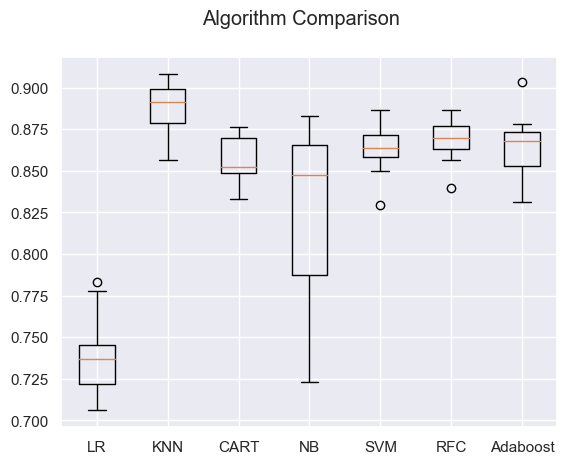

In [271]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Calculating time for model fitting

In [272]:
cv_result=cross_validate(lr1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.012438106536865234

In [273]:
cv_result=cross_validate(model_dt1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.006302332878112793

In [274]:
cv_result=cross_validate(model_g1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.004082918167114258

In [275]:
cv_result=cross_validate(model_ab1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.02811591625213623

In [276]:
cv_result=cross_validate(model_svc1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.638573169708252

In [277]:
cv_result=cross_validate(model_knn1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.004309988021850586

In [278]:
cv_result=cross_validate(model_knn2,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.00626070499420166

In [279]:
cv_result=cross_validate(model_rf1,x_train_res,y_train_res,cv=kfold)
cv_result['fit_time'].mean()

0.4683917760848999

# Stratified Sampling

In [280]:
final_df1=final_df.copy()
final_df1

voice_plan  intl_plan  customer_calls  total_charge  Churn  \
1            1.0        0.0        0.111111      0.718793      0   
2            1.0        0.0        0.111111      0.495903      0   
3            0.0        0.0        0.000000      0.537558      0   
4            0.0        1.0        0.222222      0.599153      0   
5            0.0        1.0        0.333333      0.398252      0   
...          ...        ...             ...           ...    ...   
4996         1.0        0.0        0.222222      0.712374      0   
4997         0.0        0.0        0.333333      0.598061      1   
4998         0.0        0.0        0.111111      0.394564      0   
4999         0.0        0.0        0.000000      0.493854      0   
5000         1.0        0.0        0.000000      0.426796      0   

      Final Churn Probability  
1                    0.000000  
2                    0.750000  
3                    0.416667  
4                    0.583333  
5                    0.583333  
...                       ...  
4996                 0.000000  
4997                 0.250000  
4998                 0.000000  
4999                 0.000000  
5000                 0.000000  

[5000 rows x 6 columns]

In [281]:
df_final=final_df1.drop(['Final Churn Probability'],axis=1)

In [282]:
final_df1.columns

Index(['voice_plan', 'intl_plan', 'customer_calls', 'total_charge', 'Churn',
       'Final Churn Probability'],
      dtype='object')

In [283]:
df_final

voice_plan  intl_plan  customer_calls  total_charge  Churn
1            1.0        0.0        0.111111      0.718793      0
2            1.0        0.0        0.111111      0.495903      0
3            0.0        0.0        0.000000      0.537558      0
4            0.0        1.0        0.222222      0.599153      0
5            0.0        1.0        0.333333      0.398252      0
...          ...        ...             ...           ...    ...
4996         1.0        0.0        0.222222      0.712374      0
4997         0.0        0.0        0.333333      0.598061      1
4998         0.0        0.0        0.111111      0.394564      0
4999         0.0        0.0        0.000000      0.493854      0
5000         1.0        0.0        0.000000      0.426796      0

[5000 rows x 5 columns]

In [284]:
from sklearn.model_selection import train_test_split
x3 = df_final.drop(columns = ["Churn"])
y3= df_final["Churn"]
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3,random_state=1)

In [285]:
x3_train.shape,y3_train.shape

((3500, 4), (3500,))

In [286]:
x3_test.shape,y3_test.shape

((1500, 4), (1500,))

In [287]:
x_train_res.shape

(5990, 4)

In [288]:
y3_train.value_counts()

0    3009
1     491
Name: Churn, dtype: int64

In [289]:
y3_test.value_counts()

0    1284
1     216
Name: Churn, dtype: int64

In [290]:
x3_train_st, x3_test_st, y3_train_st, y3_test_st = train_test_split(x3, y3, test_size=0.3,random_state=1,stratify=y)

In [291]:
y3_train_st.value_counts(normalize=True)*100

0    85.857143
1    14.142857
Name: Churn, dtype: float64

In [292]:
y3_test_st.value_counts(normalize=True)*100

0    85.866667
1    14.133333
Name: Churn, dtype: float64

In [293]:
x3_train_st.shape,y3_train_st.shape

((3500, 4), (3500,))

In [294]:
x3_test_st.shape,y3_test_st.shape

((1500, 4), (1500,))

In [295]:
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10)
model_knn_st = KNeighborsClassifier(n_neighbors=12)
model_knn_st.fit(x3_train_st,y3_train_st)
results = cross_val_score(model_knn_st, x3_train_st, y3_train_st, cv=kfold)
cv_result=cross_validate(model_knn_st,x3_train_st,y3_train_st,cv=kfold)
print(results.mean())
y_pred_knn_st=model_knn_st.predict(x3_test_st)

print(classification_report(y3_test_st,y_pred_knn_st))

0.9391428571428572
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1288
           1       0.89      0.60      0.72       212

    accuracy                           0.93      1500
   macro avg       0.92      0.79      0.84      1500
weighted avg       0.93      0.93      0.93      1500



In [296]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x3_train_st, y3_train_st)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [297]:
print(grid.best_score_)
print(grid.best_params_)

0.942
{'n_neighbors': 2}


In [298]:
from sklearn.model_selection import cross_validate
kfold = KFold(n_splits=10)
model_knn_st = KNeighborsClassifier(n_neighbors=2)
model_knn_st.fit(x3_train_st,y3_train_st)
results = cross_val_score(model_knn_st, x3_train_st, y3_train_st, cv=kfold)
cv_result=cross_validate(model_knn_st,x3_train_st,y3_train_st,cv=kfold)
print(results.mean())
y_pred_knn_st=model_knn_st.predict(x3_test_st)

print(classification_report(y3_test_st,y_pred_knn_st))

0.9428571428571428
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1288
           1       0.92      0.63      0.75       212

    accuracy                           0.94      1500
   macro avg       0.93      0.81      0.86      1500
weighted avg       0.94      0.94      0.94      1500



In [299]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10)
model_rf1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf1.fit(x3_train_st,y3_train_st)
results = cross_val_score(model_rf1, x3_train_st, y3_train_st, cv=kfold)
print(results.mean())
y_pred_rf1=model_rf1.predict(x3_test_st)
print(classification_report(y3_test_st,y_pred_rf1))

0.9362857142857143
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.77      0.70      0.73       212

    accuracy                           0.93      1500
   macro avg       0.86      0.83      0.85      1500
weighted avg       0.93      0.93      0.93      1500



In [300]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model_svc1 = SVC(kernel='rbf')
model_svc1.fit(x3_train_st,y3_train_st)
y_pred_svc1=model_svc1.predict(x3_test_st)
results = cross_val_score(model_svc, x3_train_st, y3_train_st, cv=kfold)
print(results.mean())

model_svc1.fit(x3_train_st,y3_train_st)
y_pred_svc1=model_svc1.predict(x3_test_st)
print(classification_report(y3_test_st,y_pred_svc1))

0.9171428571428573
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1288
           1       0.90      0.39      0.55       212

    accuracy                           0.91      1500
   macro avg       0.91      0.69      0.75      1500
weighted avg       0.91      0.91      0.89      1500



In [301]:
num_trees = 10

kfold = KFold(n_splits=10)
model_ab1 = AdaBoostClassifier(n_estimators=num_trees)
model_ab1.fit(x3_train_st,y3_train_st)
results = cross_val_score(model_ab, x3_train_st, y3_train_st, cv=kfold)
print(results.mean())

y_pred_ab1=model_ab1.predict(x3_test_st)
print(classification_report(y3_test_st,y_pred_ab1))

0.9102857142857144
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1288
           1       0.76      0.49      0.59       212

    accuracy                           0.91      1500
   macro avg       0.84      0.73      0.77      1500
weighted avg       0.90      0.91      0.90      1500



In [302]:
kfold = KFold(n_splits=10)
model_g1 = GaussianNB()
model_g1.fit(x3_train_st,y3_train_st)
results = cross_val_score(model_g1, x3_train_st, y3_train_st, cv=kfold)
print(results.mean())

y_pred_nb=model_g.predict(x3_test_st)
print(classification_report(y3_test_st,y_pred_nb))

0.8594285714285714
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1288
           1       0.47      0.42      0.44       212

    accuracy                           0.85      1500
   macro avg       0.69      0.67      0.68      1500
weighted avg       0.84      0.85      0.85      1500



In [303]:
kfold = KFold(n_splits=10)

model_dt1 = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model_dt1, x3_train_st, y3_train_st, cv=kfold)
print(results.mean())

model_dt1 = DecisionTreeClassifier()
dt1=model_dt1.fit(x3_train_st,y3_train_st)

y_pred_cart1=model_dt1.predict(x3_test_st)
print(classification_report(y3_test_st,y_pred_cart1))

0.9259999999999999
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1288
           1       0.72      0.71      0.72       212

    accuracy                           0.92      1500
   macro avg       0.84      0.83      0.83      1500
weighted avg       0.92      0.92      0.92      1500



In [304]:
lr1 = LogisticRegression()
lr1.fit(x3_train_st, y3_train_st)
y_pred_lr = lr1.predict(x3_test_st)
  
# print classification report
print(classification_report(y3_test_st,y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1288
           1       0.56      0.16      0.25       212

    accuracy                           0.86      1500
   macro avg       0.72      0.57      0.59      1500
weighted avg       0.83      0.86      0.83      1500



It is observed that although stratified sampling increases the accuracy for the model, it decreases the recall that is recall for '0' and '1' varies a lot.Hence, selection of the model based on the SMOTE analysis will be better.
Here,based on SMOTE analysis, KNN(K nearest neighbours) gives the best classification report based on accuracy and recall.
Hence, KNN is selected as the final model for predicting the churn probability.

In [305]:
#Saving the model using pickle.
import pickle
file_name='Telecommunication_churn.sav'
pickle.dump(model_knn1,open(file_name,'wb'))

In [306]:
#loading the saved model
loaded_model=pickle.load(open('Telecommunication_churn.sav','rb'))

In [307]:
input_data=(1.0,1.0,0,0.78)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

[1]
